# Initial Steps
The Initial Step is usually to invoke the various Python libraries which contain powerful tools for data exploration and visualization. Four commonly used libraries in this context are Pandas, NumPy, Seaborn, and Matplotlib.

In [12]:
# preliminary import of libraries etc
import pandas as pd
import numpy as np

# modules for ploting
import matplotlib.pyplot as plt
import seaborn as sns

from yellowbrick.style import set_palette, color_palette
set_palette('yellowbrick')

from matplotlib import rcParams
rcParams["figure.figsize"] = [8, 6]

# What the Libraries do
**Pandas** is a versatile library that provides data structures and functions for efficiently manipulating and analyzing data. It introduces the DataFrame, a tabular data structure that allows easy handling of data, such as filtering, sorting, and aggregating. With Pandas, you can quickly load data from various file formats, perform data cleaning, and carry out complex data operations with ease.

**NumPy**, short for Numerical Python, is a fundamental library for scientific computing in Python. It provides powerful data structures, such as multi-dimensional arrays, along with a collection of mathematical functions for efficient numerical operations. NumPy is widely used for tasks like numerical computing, linear algebra, and random number generation. Its efficient array operations make it an essential library for data manipulation and analysis.

**Seaborn** is a statistical data visualization library built on top of Matplotlib. It provides a high-level interface for creating informative and aesthetically pleasing visualizations. Seaborn simplifies the process of creating common statistical plots, such as scatter plots, histograms, and bar charts. It also offers advanced features like visualizing statistical relationships and categorical data.

**Matplotlib** is a powerful plotting library that offers a wide range of customizable visualizations. It provides low-level interfaces for creating basic plots, giving you full control over the design and layout. Matplotlib can generate line plots, scatter plots, histograms, bar charts, and many other types of visualizations. It is highly flexible and allows you to create publication-quality figures for data exploration and presentation.







Loading the file: the easiest way is to download the excel file from the UCI repository (https://archive.ics.uci.edu/static/public/193/cardiotocography.zip ) , unzip and then upload to the colabs file system or the google drive ( see my blog https://pharmamodelingblog.com/2023/07/14/data-exploration/ ) . In this case, I uploaded to the sample_data files folder . I then click on the file in that folder and copy path i.e. /content/sample_data/CTG.xls


In [15]:
# loading the data from the excel file
# I will load the raw data sheet only
file_path = '/content/sample_data/CTG.xls' # here I input the file path
CTG_data = pd.read_excel(file_path, sheet_name='Raw Data')

FileNotFoundError: ignored

If this doesn't work you can access it directly from my github account

In [18]:
import pandas as pd
import requests
from io import BytesIO

#   raw link to the CTG.xls file on GitHub
url = 'https://github.com/Entrop999y/CTG-Data-Tutorials/raw/main/CTG.xls'

# Download the Excel file using requests
response = requests.get(url)

# Read the data from the downloaded content
CTG_data = pd.read_excel(BytesIO(response.content), sheet_name='Raw Data')




Then, we used the Pandas method .head() to view the dataframe


In [19]:
# view the first few lines in order to decide how to wrangle the file initially
CTG_data.head()

,FileName,Date,SegFile,b,e,LBE,LB,AC,FM,UC,...,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
0,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Variab10.txt,1996-12-01,CTG0001.txt,240.0,357.0,120.0,120.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,2.0
2,Fmcs_1.txt,1996-05-03,CTG0002.txt,5.0,632.0,132.0,132.0,4.0,0.0,4.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
3,Fmcs_1.txt,1996-05-03,CTG0003.txt,177.0,779.0,133.0,133.0,2.0,0.0,5.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
4,Fmcs_1.txt,1996-05-03,CTG0004.txt,411.0,1192.0,134.0,134.0,2.0,0.0,6.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0


#what is a Pandas Dataframe?

*This is written from the point of view of someone who has experience with excel in order to improve the understanding.*

A Pandas DataFrame is a powerful data structure that can be thought of as a table similar to what you might find in Excel. It consists of rows and columns, just like an Excel spreadsheet. Each column in a DataFrame represents a different variable or attribute, such as names, ages, or prices.

What makes DataFrames especially useful is their ability to handle large amounts of data efficiently. They provide a range of functions and operations specifically designed for data manipulation and analysis. For example, you can easily filter rows based on specific conditions, sort the data, or perform calculations on specific columns.

In addition to basic operations, DataFrames in Pandas also offer advanced features such as grouping data, merging multiple DataFrames together, and handling missing values. These functionalities allow for comprehensive data exploration and analysis.

DataFrames are not only capable of handling structured data, but they can also handle different data types within the same table. This flexibility is particularly useful when dealing with diverse datasets that contain text, numbers, dates, or categorical variables.

Furthermore, Pandas provides a wide range of functions to import data from various file formats, including Excel, CSV, and SQL databases. This makes it easy to load your data into a DataFrame and start exploring and analyzing it using Python.










# Reducing Dimensions
In the previous blog we showed how the Data Analyist's background research established which of the columns were **features and targets** and which were merely meta data.


1.   **Metadata:** Metadata refers to additional information about the data stored in a DataFrame. It provides descriptive details about the dataset itself, such as column names, data types, units of measurement, and any other relevant information. Metadata helps in understanding and interpreting the data accurately.
2.   **Features:** In a DataFrame, features are the columns that represent the independent variables or input variables in a machine learning or data analysis task. These columns contain the various attributes or characteristics of the dataset that are used to make predictions or draw insights.
3. **Targets:** Targets, also known as dependent variables or output variables, are the columns in a DataFrame that represent the variable you want to predict or analyze. In a machine learning context, targets are the values you want your model to predict based on the provided features



In [20]:
# dropping 'FileName', 'Date', 'SegFile', 'b', 'e' as they are not needed for solution 3
CTG_data.drop(['FileName', 'Date', 'SegFile', 'b', 'e'], axis=1,inplace=True)
# permanently drop from the data frame

In [21]:
# Then checking the dataframe to see the results
CTG_data.head()

,LBE,LB,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,...,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,120.0,120.0,0.0,0.0,0.0,73.0,0.5,43.0,2.4,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,2.0
2,132.0,132.0,4.0,0.0,4.0,17.0,2.1,0.0,10.4,2.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
3,133.0,133.0,2.0,0.0,5.0,16.0,2.1,0.0,13.4,2.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
4,134.0,134.0,2.0,0.0,6.0,16.0,2.4,0.0,23.0,2.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0


Further tidying of the dataframe: the first row is blank and shows up as index [0] NaN....... where NaN means "Not a Number"


In [22]:
# dropping row index 0 as its simply a blank line
CTG_data.drop(labels=0, axis=0, inplace=True)

In [23]:
# Then checking the dataframe to see the results
CTG_data.head()

,LBE,LB,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,...,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
1,120.0,120.0,0.0,0.0,0.0,73.0,0.5,43.0,2.4,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,2.0
2,132.0,132.0,4.0,0.0,4.0,17.0,2.1,0.0,10.4,2.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
3,133.0,133.0,2.0,0.0,5.0,16.0,2.1,0.0,13.4,2.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
4,134.0,134.0,2.0,0.0,6.0,16.0,2.4,0.0,23.0,2.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
5,132.0,132.0,4.0,0.0,5.0,16.0,2.4,0.0,19.9,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0


#Data Quality Reports

## A brief explanation of the difference between Categorical and Continuous Features

**Continuous Features: **Continuous features, also known as numerical or quantitative features, represent variables that can take on any value within a range. These features are typically numeric and can include measurements such as height, weight, temperature, or time. Continuous features have a meaningful order and can be subjected to mathematical operations like addition, subtraction, or multiplication. In data analysis, continuous features often require techniques such as statistical analysis, visualization, and regression models to uncover patterns or relationships within the data.

Categorical Features: Categorical features, also known as qualitative features, represent variables that fall into distinct categories or groups. These features can be represented by strings, labels, or numbers that represent specific categories. Examples of categorical features include gender (male/female), color (red/blue/green), or country of origin. Categorical features do not have a natural order or numerical meaning. In data analysis, categorical features often require techniques like frequency analysis, cross-tabulation, and visualization using bar plots or pie charts to understand the distribution and relationships between categories.

## The purpose of a Data Quality Report
A data quality report is an essential step in preparing data for machine learning. We prepare it because we need to:

**Identify Data Issues:** A data quality report helps to identify and address any data issues or anomalies present in the dataset. It allows you to assess the overall quality of the data, including missing values, outliers, inconsistent formatting, duplicate records, or incorrect data types. By understanding the data quality, you can take appropriate steps to clean and preprocess the data, ensuring that it is suitable for machine learning algorithms.

**Ensure Data Completeness:** A data quality report helps to ensure that the dataset is complete and contains all the necessary information required for the machine learning task. It allows you to identify any missing data points or incomplete records, enabling you to handle **missing values** appropriately, either by imputing them or making informed decisions on how to handle them during the modeling process.

**Assess Data Accuracy:** Accuracy is crucial in machine learning models. A data quality report allows you to assess the accuracy of the data by comparing it against external sources or ground truth. It helps you identify any discrepancies, inconsistencies, or errors in the dataset, which can significantly impact the performance and reliability of the resulting machine learning models.

**Understand Data Distribution and Patterns**: A data quality report provides insights into the distribution of variables, relationships between features, and any underlying patterns in the data. It allows you to visualize and analyze the data using descriptive statistics, histograms, scatter plots, or other visualizations. Understanding the data distribution and patterns helps in selecting appropriate machine learning algorithms, feature engineering, and determining potential challenges or biases in the data.

**Support Decision Making:** A data quality report enables informed decision making throughout the machine learning process. It helps stakeholders, data scientists, and analysts understand the strengths, limitations, and potential risks associated with the dataset. It guides the selection of appropriate data preprocessing techniques, feature engineering strategies, and model evaluation methods.


#  Data Quality Report for the Continuous features

In [24]:
# checking to see  what pandas accepts as continuous features in this data set
CTG_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
LBE,2126.0,133.303857,9.840844,106.0,126.0,133.0,140.0,160.0
LB,2126.0,133.303857,9.840844,106.0,126.0,133.0,140.0,160.0
AC,2126.0,2.722484,3.560850,0.0,0.0,1.0,4.0,26.0
FM,2127.0,7.503056,39.030452,0.0,0.0,0.0,2.0,564.0
UC,2127.0,3.669017,2.877148,0.0,1.0,3.0,5.0,23.0
ASTV,2127.0,47.008933,17.210648,12.0,32.0,49.0,61.0,87.0
MSTV,2127.0,1.335449,0.891543,0.2,0.7,1.2,1.7,7.0
ALTV,2127.0,9.884814,18.476534,0.0,0.0,0.0,11.0,91.0
MLTV,2127.0,8.207616,5.701926,0.0,4.6,7.4,10.8,50.7
DL,2128.0,1.576128,2.517794,0.0,0.0,0.0,3.0,16.0


**Comment on the Result:** Basically pandas perceives every attribute as being continuous in nature. However, for example, NSP [Normal=1; Suspect=2; Pathologic=3 ] is categorical data which the Sistoport 2.0 software has coded numerically.
Thus we need to apply a more human approach and manually decide Continuous vs Categorical

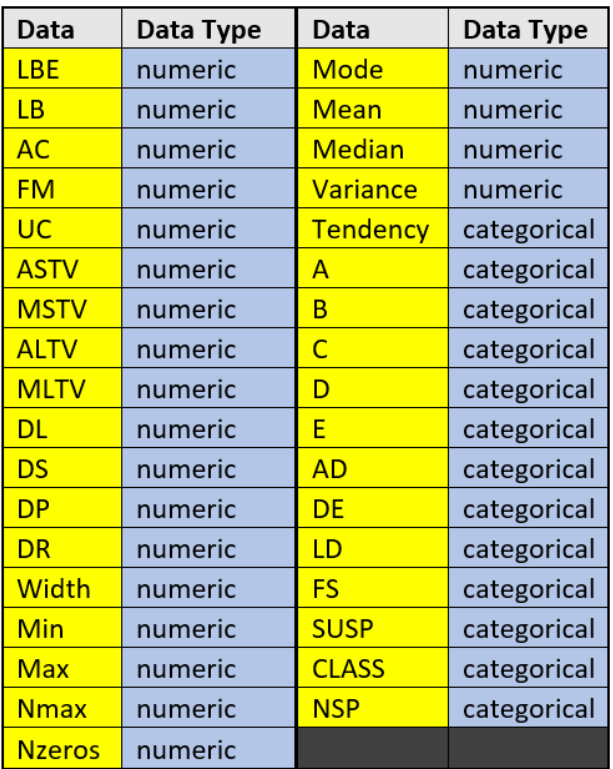

Table 1. Deciding the nature of the features (including Taget features)

**Note:**

For the Sistoport generated data only histogram tendency is categorical (although it categorises in terms of three possible numerical values)

For the Human Expert data, only LBE (the FHR baseline value in bpm) is numeric, the rest are classifications by the experts that are ordinal in nature, largely, and therefore are categorical

In [25]:
# running the continuous data quality report
CTG_data[['LBE','LB','AC','FM','UC','ASTV','MSTV',
          'ALTV','MLTV','DL','DS','DP','DR','Width',
          'Min','Max','Nmax','Nzeros','Mode','Mean','Median'


]].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
LBE,2126.0,133.303857,9.840844,106.0,126.0,133.0,140.0,160.0
LB,2126.0,133.303857,9.840844,106.0,126.0,133.0,140.0,160.0
AC,2126.0,2.722484,3.560850,0.0,0.0,1.0,4.0,26.0
FM,2127.0,7.503056,39.030452,0.0,0.0,0.0,2.0,564.0
UC,2127.0,3.669017,2.877148,0.0,1.0,3.0,5.0,23.0
ASTV,2127.0,47.008933,17.210648,12.0,32.0,49.0,61.0,87.0
MSTV,2127.0,1.335449,0.891543,0.2,0.7,1.2,1.7,7.0
ALTV,2127.0,9.884814,18.476534,0.0,0.0,0.0,11.0,91.0
MLTV,2127.0,8.207616,5.701926,0.0,4.6,7.4,10.8,50.7
DL,2128.0,1.576128,2.517794,0.0,0.0,0.0,3.0,16.0


**Comment:** Analysing the report it is immediately noted:

The count for certain attributes is is >2126 the reported number data set entries on the UCI Irvine repository.
Opening the original excel file and sheet, it appears the research scientist who created the sheet randomly used some of the lower cells for calculations. This calculations are not required for our purpose and so I will drop them next

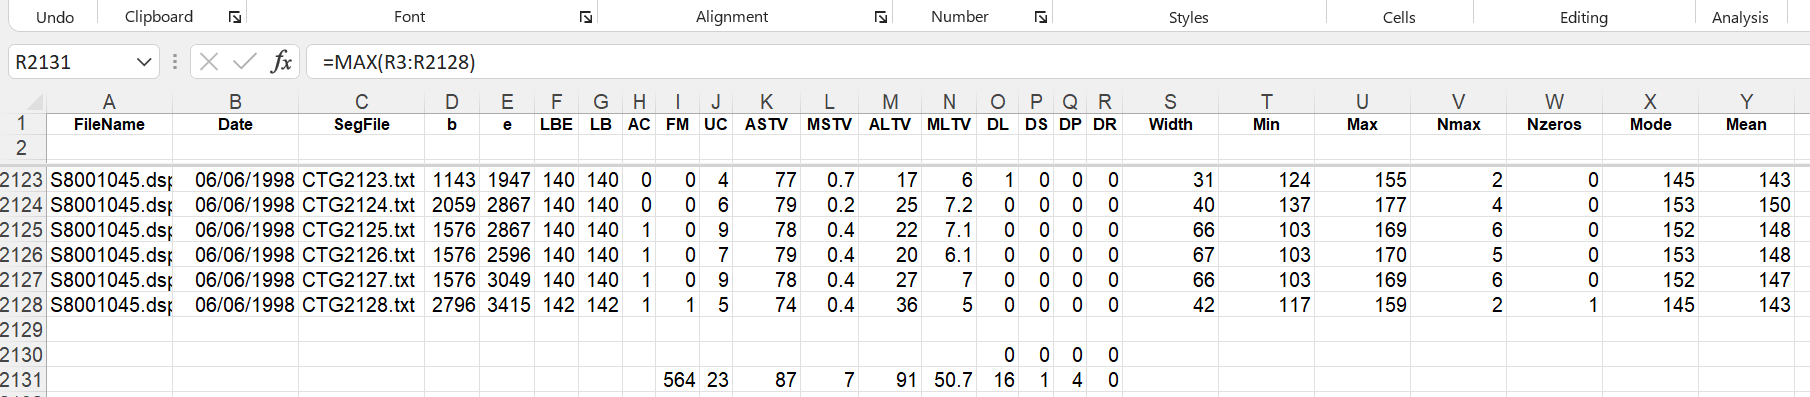

In [26]:
# len(CTG_data. index)
# dropping the rows corresponding 2130 and 2131  by index = excel index -2 rows
CTG_data.drop(CTG_data.index[[2127, 2128]], inplace=True)
# rerun report
CTG_data[['LBE','LB','AC','FM','UC','ASTV','MSTV',
        'ALTV','MLTV','DL','DS','DP','DR','Width',
        'Min','Max','Nmax','Nzeros','Mode','Mean','Median'


]].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
LBE,2126.0,133.303857,9.840844,106.0,126.0,133.0,140.0,160.0
LB,2126.0,133.303857,9.840844,106.0,126.0,133.0,140.0,160.0
AC,2126.0,2.722484,3.560850,0.0,0.0,1.0,4.0,26.0
FM,2126.0,7.241298,37.125309,0.0,0.0,0.0,2.0,564.0
UC,2126.0,3.659925,2.847094,0.0,1.0,3.0,5.0,23.0
ASTV,2126.0,46.990122,17.192814,12.0,32.0,49.0,61.0,87.0
MSTV,2126.0,1.332785,0.883241,0.2,0.7,1.2,1.7,7.0
ALTV,2126.0,9.846660,18.396880,0.0,0.0,0.0,11.0,91.0
MLTV,2126.0,8.187629,5.628247,0.0,4.6,7.4,10.8,50.7
DL,2126.0,1.570085,2.499229,0.0,0.0,0.0,3.0,16.0


Comment:
The report now includes only rows with actual data and not rows used for previous calculations in excel by the data originators. Summarising The findings:
### Summary Data Quality Report  Continuous Data
1. All rows contain continuous data and the count now matches the number of samples 2126.

2. Only the column "DR" stands out as having an unusual statistical profile i.e Irregular Cardinality. However, DR stands for "Repetitive Decelerations" (Recurrent Decelerations) and itcould be possible their frequency is so low as not to be recorded in a n= 2126 sized sample. Reassuringly, they do not appear on the Expert Classification data either which lends credence to the assumption they simply did not occur in 2126 samples.

Recurrent decelerations ( variable, early, or late ) are decelerations which occur with > 50% of uterine contractions in any 20 minute segment (Intrapartum Fetal Monitoring, 2022). I endeavoured to find a figure for their frequency in the literature worldwide but found none. They appear to warn of impending acidemia from lifethreatening occurences such as cord compression.

3. The DR Column, which has irregular Cardinality, offers no information for the anticipated Machine Learning treatment and would possibly reduce its effectivenes .


4. The only concern for missing values (or more correctly "Invalid data")is the possibility for FM (Fetal Movement) attribute there are more than 50 % zeros. As mentioned in the investigative portion above, it's highly unlikely the fetus did not move in a dynmaic process such as child birth. Therefore it is likely these are missing values and will be assumed to be.


In [27]:
# dropping the DR column which has "No information content"
CTG_data.drop('DR', axis=1, inplace=True)

In [28]:
CTG_data.head()

,LBE,LB,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,...,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
1,120.0,120.0,0.0,0.0,0.0,73.0,0.5,43.0,2.4,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,2.0
2,132.0,132.0,4.0,0.0,4.0,17.0,2.1,0.0,10.4,2.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
3,133.0,133.0,2.0,0.0,5.0,16.0,2.1,0.0,13.4,2.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
4,134.0,134.0,2.0,0.0,6.0,16.0,2.4,0.0,23.0,2.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
5,132.0,132.0,4.0,0.0,5.0,16.0,2.4,0.0,19.9,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0


# Data Quality report for the Categorical Features

In [29]:
# testing which attributes pandas sees as categorical
CTG_data.describe(include=['object', 'category']).transpose()

ValueError: ignored

The error message indicates that there were no object or category columns found in the CTG_data DataFrame. This means that either there are no columns with object or category data types, **or the data types of the columns were not correctly recognized as object or category.**

The next step is to force Pandas to accept the columns known to be categorical from our background research to be accepted as categorical

In [30]:
# quality report categorical
CTG_data[['Tendency','A','B','C','D','E','AD','DE','LD','FS','SUSP','CLASS','NSP'
]].astype('object').describe(include='object').transpose()

,count,unique,top,freq
Tendency,2126.0,3.0,0.0,1115.0
A,2126.0,2.0,0.0,1742.0
B,2126.0,2.0,0.0,1547.0
C,2126.0,2.0,0.0,2073.0
D,2126.0,2.0,0.0,2045.0
E,2126.0,2.0,0.0,2054.0
AD,2126.0,2.0,0.0,1794.0
DE,2126.0,2.0,0.0,1874.0
LD,2126.0,2.0,0.0,2019.0
FS,2126.0,2.0,0.0,2057.0


Next, because these columns are categorical, it is appropriate to look at the subcategories or levels within

In [31]:
# we use a for loop to loop through the columns then we make our output easier to understand by naming the columns
categorical_columns = ['A', 'B', 'C', 'D', 'E', 'AD', 'DE', 'LD', 'FS', 'SUSP', 'CLASS', 'NSP', 'Tendency']

for column in categorical_columns:
    unique_values = CTG_data[column].unique()
    print(f"Column: {column}")
    print(unique_values)
    print()


Column: A
[ 0.  1. nan]

Column: B
[ 0.  1. nan]

Column: C
[ 0.  1. nan]

Column: D
[ 0.  1. nan]

Column: E
[ 0.  1. nan]

Column: AD
[ 0.  1. nan]

Column: DE
[ 0.  1. nan]

Column: LD
[ 0.  1. nan]

Column: FS
[ 1.  0. nan]

Column: SUSP
[ 0.  1. nan]

Column: CLASS
[ 9.  6.  2.  8. 10.  7.  1.  3.  5.  4. nan]

Column: NSP
[ 2.  1.  3. nan]

Column: Tendency
[ 1.  0. -1. nan]



It is noted that "NaN" is a level of each category...which we don't want. We need to identify where "NaN" occurs to better understand what is going on and what remedy we must attempt

In [32]:
# investigating where the NaNs  are
CTG_data.isnull()

,LBE,LB,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,...,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2123,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2124,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2125,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2126,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


So, there appears to be a row with index 2127 that shouldn't be there.

In [33]:
#  using iloc this row must be visualised to see what the problem is
rowData = CTG_data.loc[ 2127]
# display the line before 2127 to identify it
rowData = CTG_data.loc[ 2126]
rowData
# result shows index 2127 is simply a blank row I inadvertantly
#included in the dataframe while wrangling the data
# return the indices to 0 for row 1 etc to allow drop method work for the NaN row
CTG_data.set_index(pd.Series(range(0,2127,1)),inplace=True) # note if you re-run the cell
# an error will result as you have removed the artifact row in the last line of code


In [34]:
rowData = CTG_data.loc[ 2126]
rowData

LBE        NaN
LB         NaN
AC         NaN
FM         NaN
UC         NaN
ASTV       NaN
MSTV       NaN
ALTV       NaN
MLTV       NaN
DL         NaN
DS         NaN
DP         NaN
Width      NaN
Min        NaN
Max        NaN
Nmax       NaN
Nzeros     NaN
Mode       NaN
Mean       NaN
Median     NaN
Variance   NaN
Tendency   NaN
A          NaN
B          NaN
C          NaN
D          NaN
E          NaN
AD         NaN
DE         NaN
LD         NaN
FS         NaN
SUSP       NaN
CLASS      NaN
NSP        NaN
Name: 2126, dtype: float64

Pandas row indexing starts at "0" instead of "1" as in the case of excel. Having reindexed the Dataframe there should only be 2125 (+ row 0) rows and not 2126

In [35]:
CTG_data.drop(CTG_data.index[2126],inplace=True)
# this finally fixes the NaN index 2127 problem

In [36]:
# trying the code to display the categorical levels again
# we use a for loop to loop through the columns then we make our output easier to understand by naming the columns
categorical_columns = ['A', 'B', 'C', 'D', 'E', 'AD', 'DE', 'LD', 'FS', 'SUSP', 'CLASS', 'NSP', 'Tendency']

for column in categorical_columns:
    unique_values = CTG_data[column].unique()
    print(f"Column: {column}")
    print(unique_values)
    print()


Column: A
[0. 1.]

Column: B
[0. 1.]

Column: C
[0. 1.]

Column: D
[0. 1.]

Column: E
[0. 1.]

Column: AD
[0. 1.]

Column: DE
[0. 1.]

Column: LD
[0. 1.]

Column: FS
[1. 0.]

Column: SUSP
[0. 1.]

Column: CLASS
[ 9.  6.  2.  8. 10.  7.  1.  3.  5.  4.]

Column: NSP
[2. 1. 3.]

Column: Tendency
[ 1.  0. -1.]



Note: This problem is typical of the data wrangling problems encountered when dealing with data sources. In this case the original investigators, working in excel, used row 2129 in the sheet to do some calculations. Pandas interprets this row and the row they skipped for clarity as a row of NaNs

In [37]:
# re-run the categorical data report
# quality report categorical
CTG_data[['Tendency','A','B','C','D','E','AD','DE','LD','FS','SUSP','CLASS','NSP'
]].astype('object').describe(include='object').transpose()

,count,unique,top,freq
Tendency,2126.0,3.0,0.0,1115.0
A,2126.0,2.0,0.0,1742.0
B,2126.0,2.0,0.0,1547.0
C,2126.0,2.0,0.0,2073.0
D,2126.0,2.0,0.0,2045.0
E,2126.0,2.0,0.0,2054.0
AD,2126.0,2.0,0.0,1794.0
DE,2126.0,2.0,0.0,1874.0
LD,2126.0,2.0,0.0,2019.0
FS,2126.0,2.0,0.0,2057.0


#### Summary: Categorical Data  Quality Report
After further data wrangling, the categorical data quality report reveals the following observations:

1. There are no missing values, and the cardinalities (number of unique categories) appear to be correct for all categorical features.

2. Based on our background knowledge, it is understood that only the "Tendency" feature is an input feature, while the remaining features are considered target features.

3. It is important to note that the categorical data has already been encoded numerically by the original investigators. This could pose potential challenges for machine learning algorithms due to the following reasons:

(a) ML algorithms may treat the encoded values as numerical, potentially overlooking the categorical nature of the data.

(b) In machine learning, data often has a "geometry" in higher dimensions, and the differences between categorical sublevels may be misrepresented if not properly handled. One-hot encoding, which creates binary variables for each category, can address this issue by imposing a geometrical constraint on the data.

(c) Considering our specific objective of labeling CTG data as "Normal, Suspicious, or Pathological," it is likely that we can drop the target features other than "NSP." This simplification aligns with our solution, which focuses on categorizing each CTG accordingly, rather than classifying each individual CTG.

By understanding these factors, we can make informed decisions regarding the encoding and handling of categorical features in our machine learning tasks.

# Visualizations
## Workup of the Continuous Features

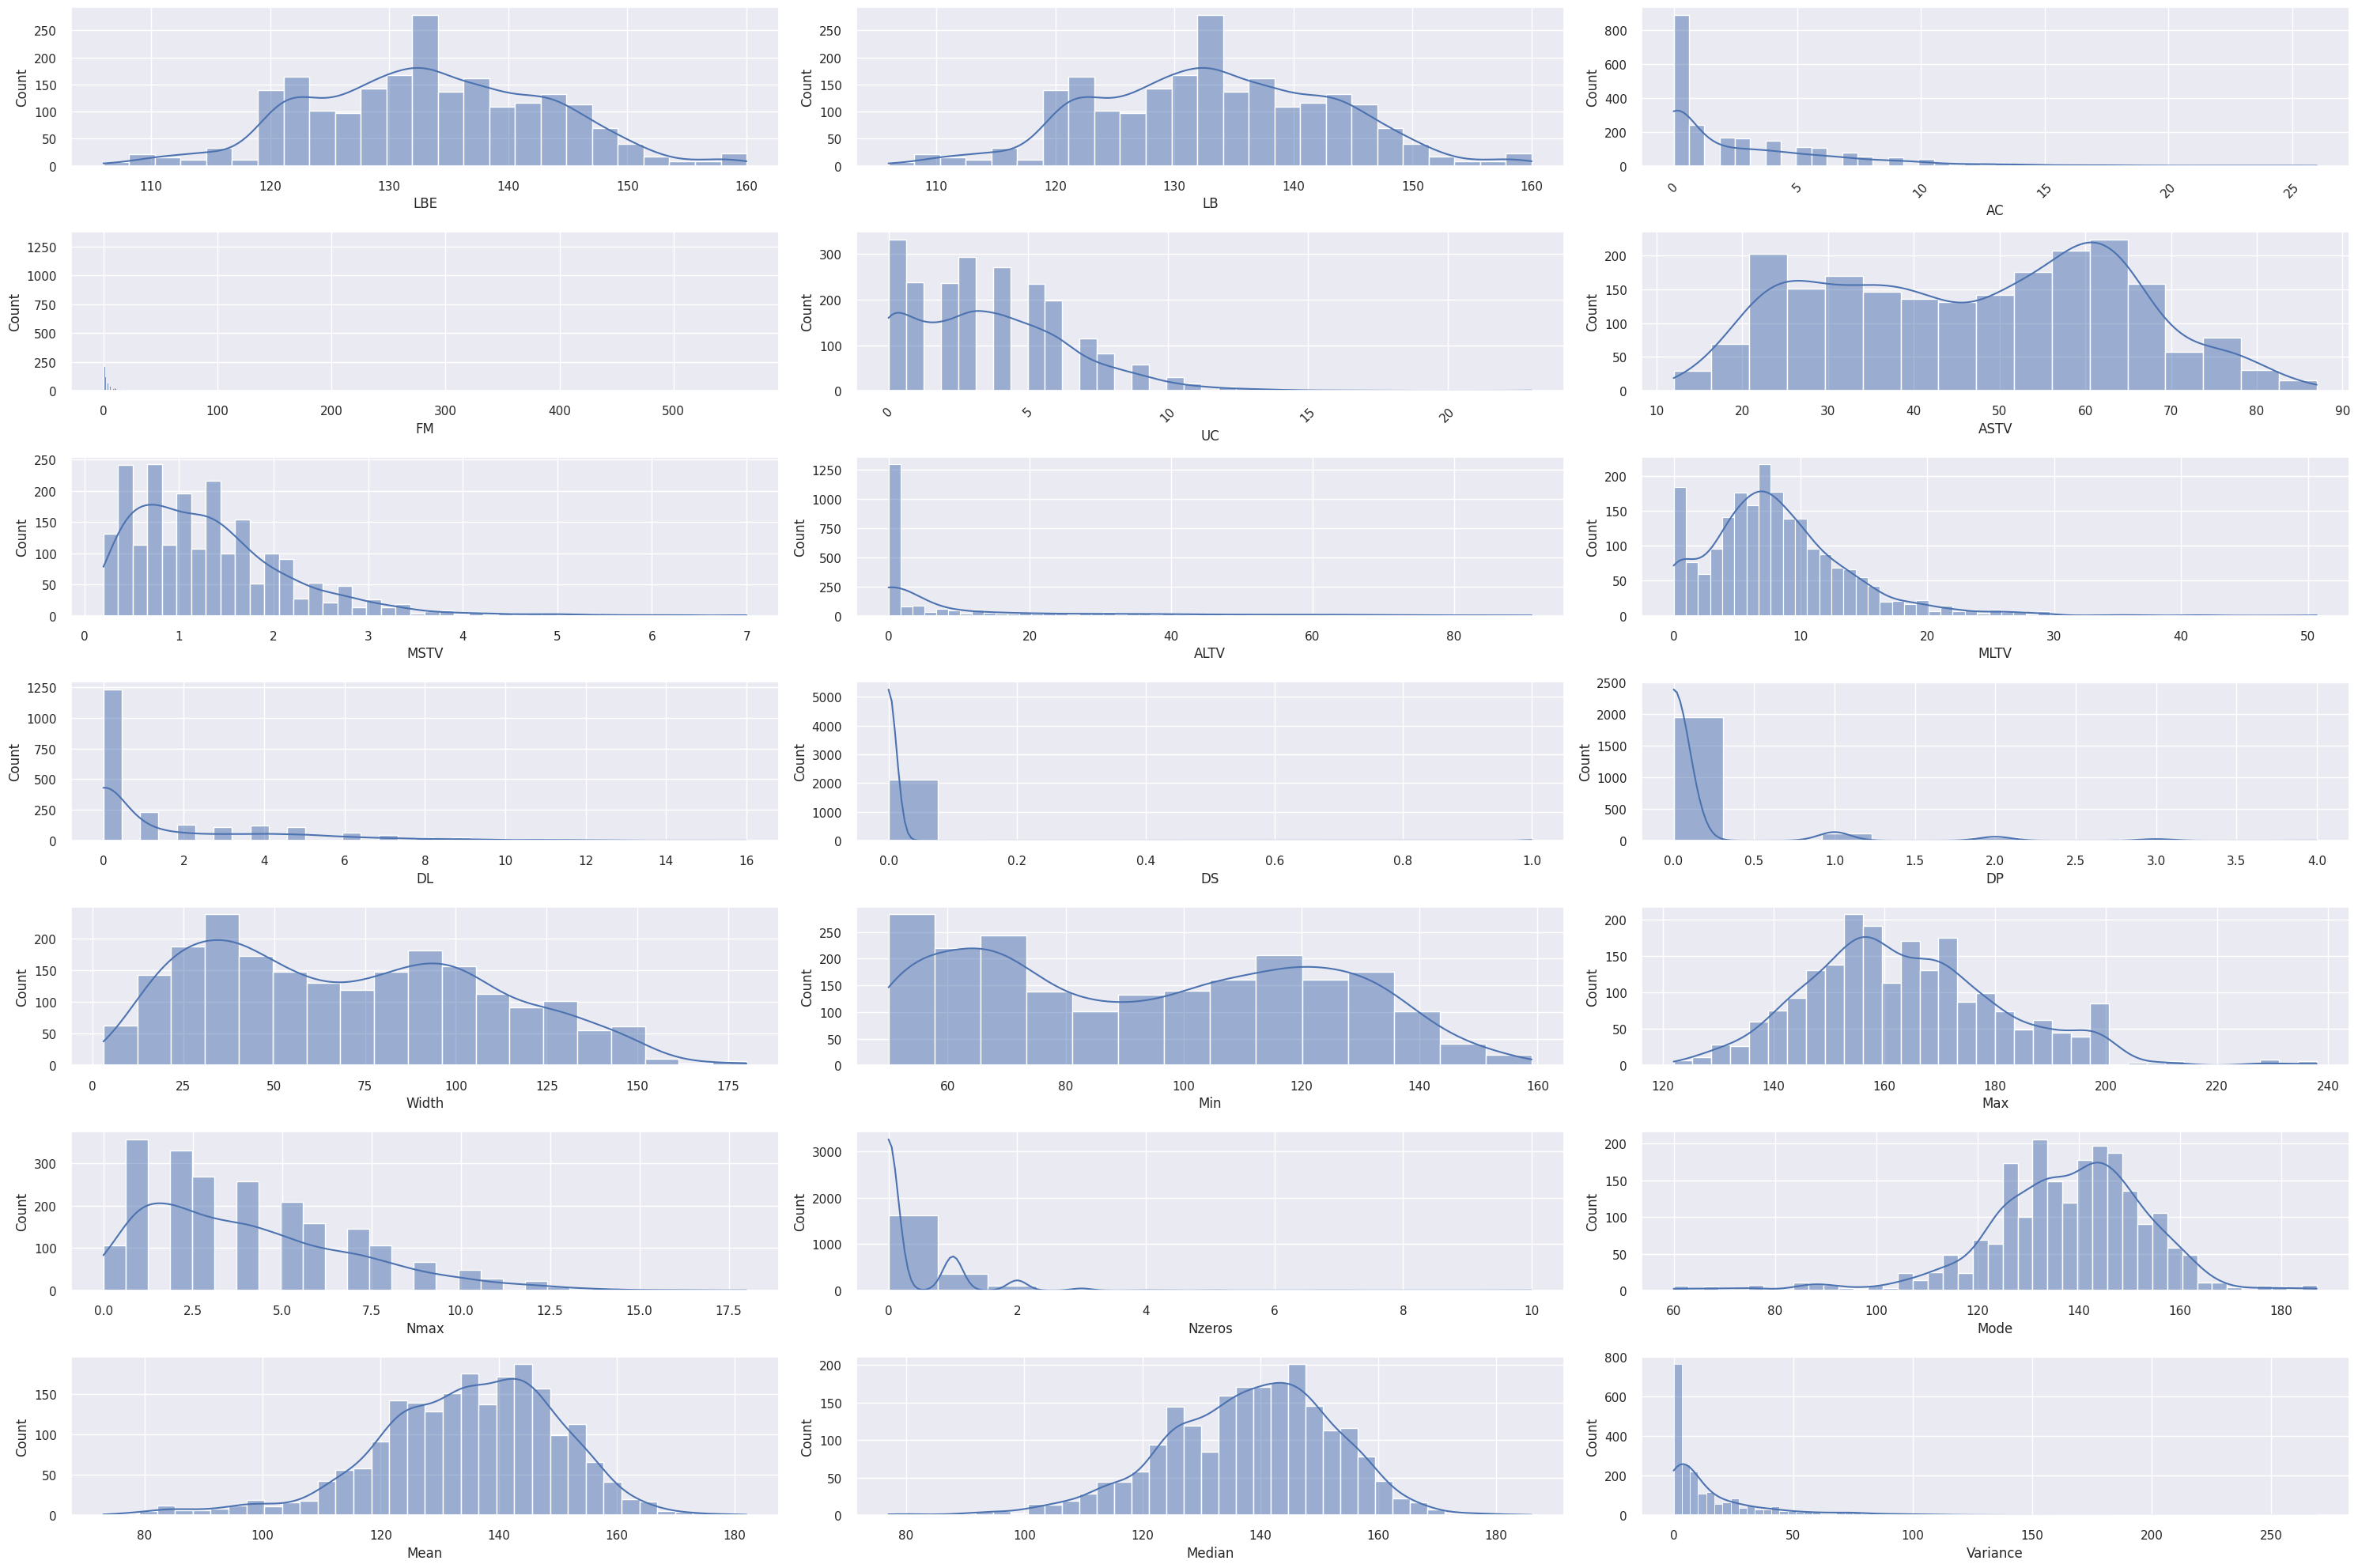

In [38]:
sns.set()
# Plotting the continuous data as histograms

fig, axes = plt.subplots(nrows=7, ncols=3, figsize=(30, 20))

# now we create the plots, informing the coordinate
sns.histplot(x='LBE', data=CTG_data, ax=axes[0, 0], stat='count',kde=True)
sns.histplot(x='LB', data=CTG_data, ax=axes[0, 1], stat='count',kde=True)  # position [0, 0]
sns.histplot(x='AC', data=CTG_data, ax=axes[0, 2], stat='count',kde=True)

sns.histplot(x='FM', data=CTG_data, ax=axes[1, 0], stat='count')
sns.histplot(x='UC', data=CTG_data, ax=axes[1, 1], stat='count',kde=True)
sns.histplot(x='ASTV', data=CTG_data, ax=axes[1, 2], stat='count',kde=True)

sns.histplot(x='MSTV', data=CTG_data, ax=axes[2, 0], stat='count',kde=True)
sns.histplot(x='ALTV', data=CTG_data, ax=axes[2, 1], stat='count',kde=True)
sns.histplot(x='MLTV', data=CTG_data, ax=axes[2, 2], stat='count',kde=True)

sns.histplot(x='DL', data=CTG_data, ax=axes[3, 0], stat='count',kde=True)
sns.histplot(x='DS', data=CTG_data, ax=axes[3, 1], stat='count',kde=True)
sns.histplot(x='DP', data=CTG_data, ax=axes[3, 2], stat='count',kde=True)


sns.histplot(x='Width', data=CTG_data, ax=axes[4, 0], stat='count',kde=True)
sns.histplot(x='Min', data=CTG_data, ax=axes[4, 1], stat='count',kde=True)

sns.histplot(x='Max', data=CTG_data, ax=axes[4, 2], stat='count',kde=True)
sns.histplot(x='Nmax', data=CTG_data, ax=axes[5, 0], stat='count',kde=True)
sns.histplot(x='Nzeros', data=CTG_data, ax=axes[5, 1], stat='count',kde=True)

sns.histplot(x='Mode', data=CTG_data, ax=axes[5, 2], stat='count',kde=True)
sns.histplot(x='Mean', data=CTG_data, ax=axes[6, 0], stat='count',kde=True)
sns.histplot(x='Median', data=CTG_data, ax=axes[6, 1], stat='count',kde=True)

sns.histplot(x='Variance', data=CTG_data, ax=axes[6, 2], stat='count',kde=True)


# here we tidy the figure layout
axes[0, 2].xaxis.set_tick_params(rotation=45)
axes[1, 1].xaxis.set_tick_params(rotation=45)
plt.tight_layout()

##Remarks arising from the Visualisations above

Comment:
The preliminary plots, using seaborn, of the continuous data reveal the following:
1. FM (fetal movement) scale is too large to see. There appears to be one large value of > 1000 on inspection
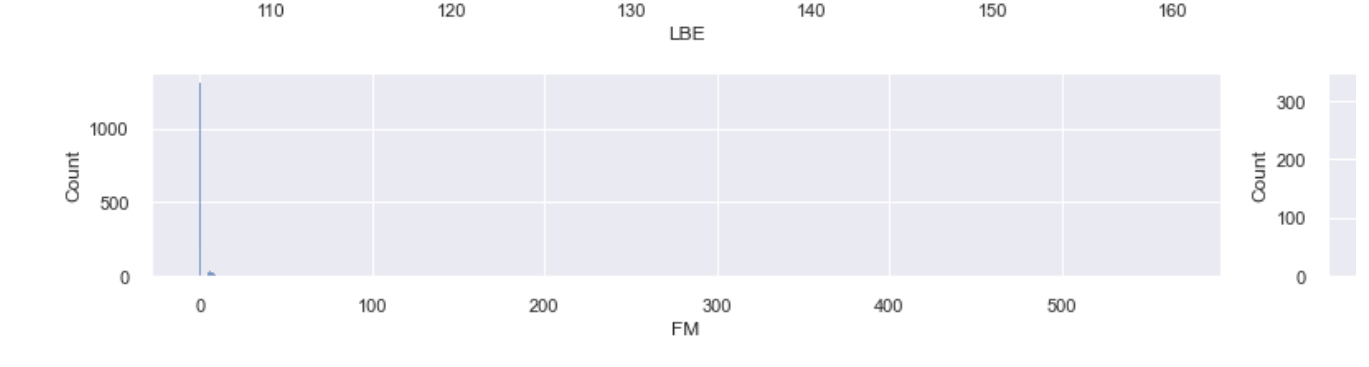




(2) the other issue now raised is what does sheet # 2 in the excel sheet represent? Sheet 1, description, suggests this is, infact processed data. Clicking on one non zero entry from the FM column in the "Data" sheet it appears that the data is normalised for certain Sistoport generated features using the time interval columns I have dropped from the  dataframe of the original "Raw data"
The attributes normalised for the time interval are:

LB	AC	FM	UC	DL	DS	DP

It is noted that LBE , the experts determination of FHR baseline does not appear in the "Data" sheet.



 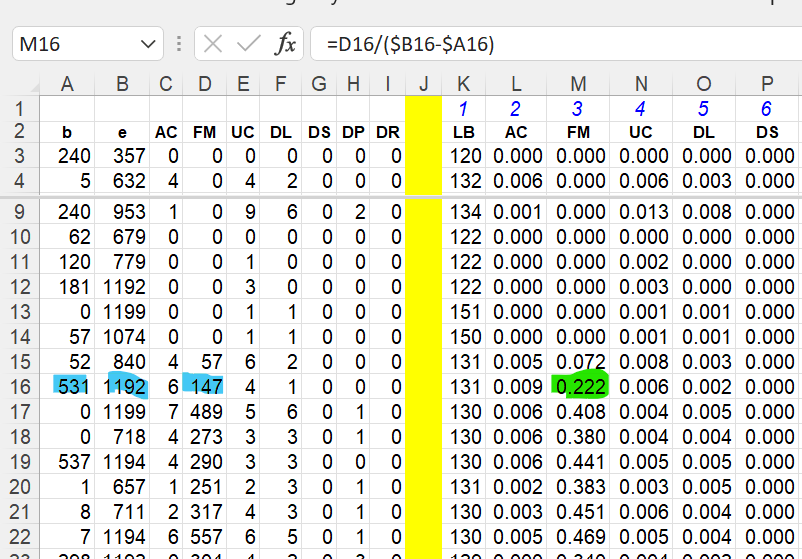  
Other Atrributes not normalised for the time interval they occur in are:

ASTV	MSTV	ALTV	MLTV	Width	Min	Max	Nmax	Nzeros	Mode	Mean	Median	Variance	Tendency

Class and NSP remain the same between the Raw Data and Data worrksheets in excel but the Expert derived attributes i.e.,

A	B	C	D	E	AD	DE	LD	FS	SUSP

have changed with no indication as to why they have changed!


###Further Exploration of the FM feature- visualisation using a rugplot

A rug plot is a type of plot that is commonly used to visualize the distribution of data points along a single axis

<Axes: xlabel='FM', ylabel='Density'>

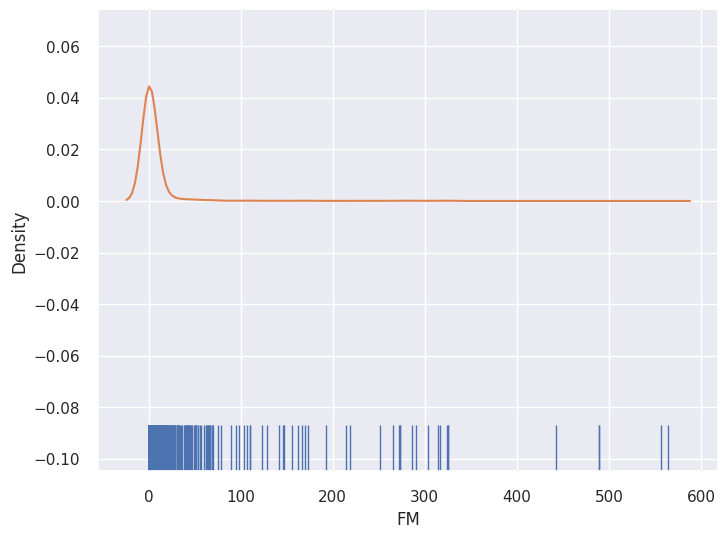

In [39]:
# showing the FM plot more clearly
sns.set_theme()

sns.rugplot(data=CTG_data,x='FM', height=0.1)
sns.kdeplot(data=CTG_data, x="FM", )

###Comment- What I believe is going on
Fetal Movements, in terms of the physiology of the birthing process indicate the activity of the fetus . If the fetus is asleep ( which is one of the Target Categories) the fetal movements will be low. The second sheet in the CTG.xls file called "Data" normalises variables such as "FM" over time while leaving the waveform descriptive variables unchanged.

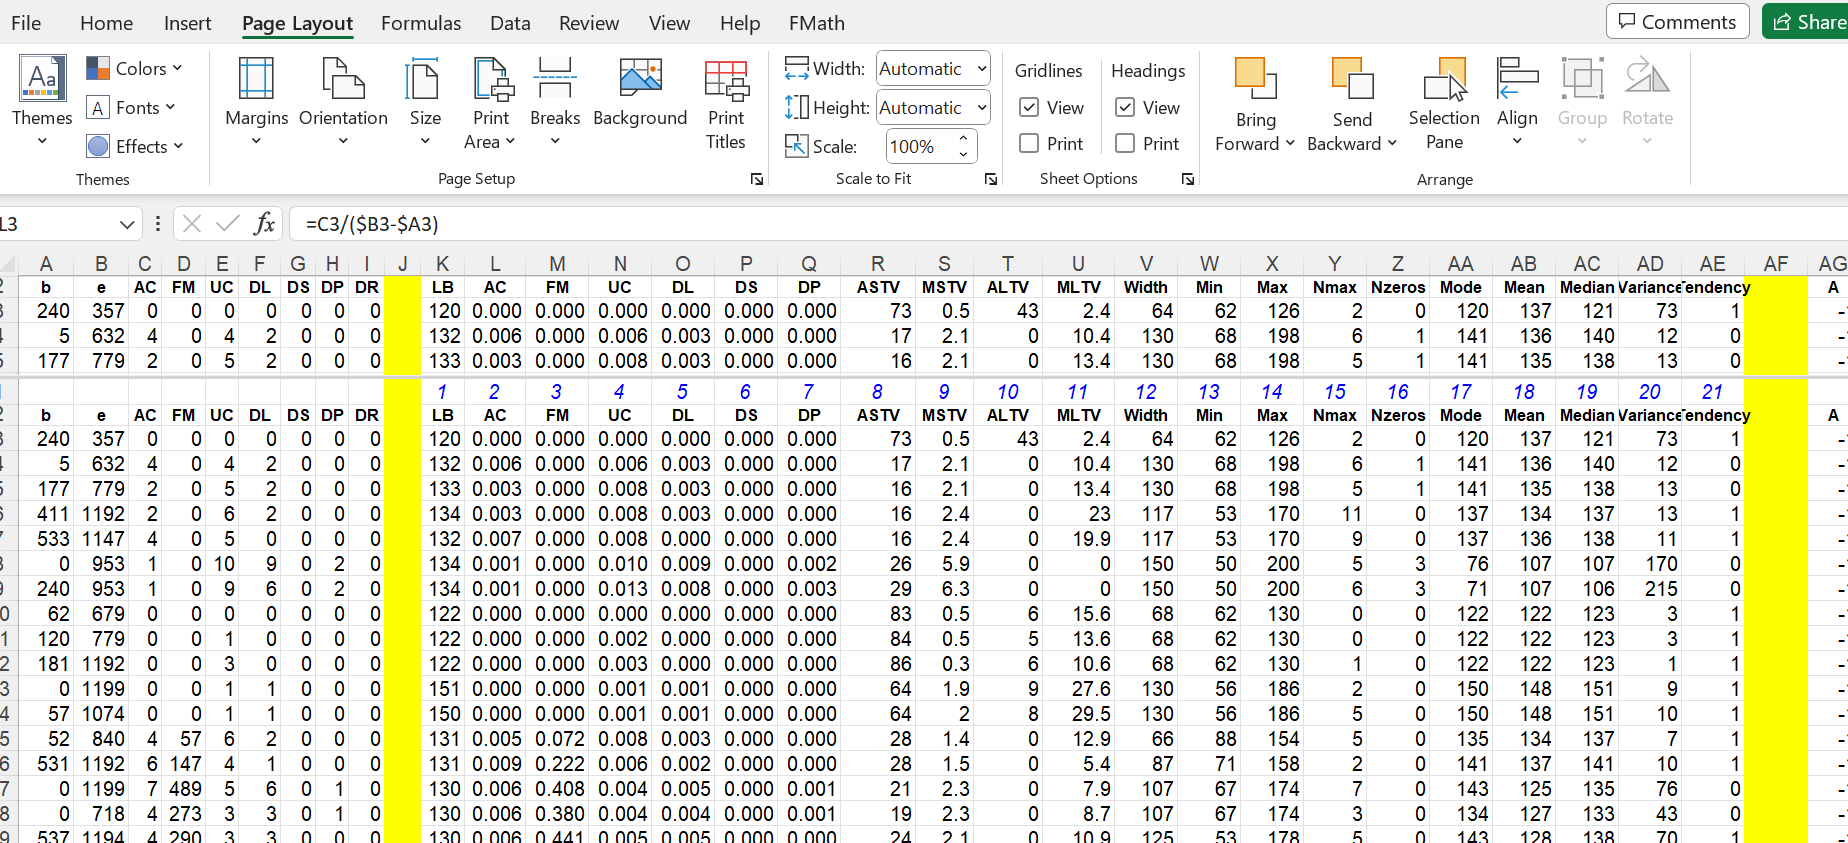
Fig. 2 The Sheet labelled "data" in the CTG.xls file

The Original Investigators also dropped the "DR" column as it contained no information i.e only had one level ("0").

###Conclusion
It would clearly make more sense to use the "Data" sheet rather than the raw data . Forming a second dataframe from this


# New Plan- use the 'Data' sheet in CTG.xls

This data sheet presented Data Wrangling difficulties due to the original data owners using an Excel based approach with column highlights and calculations. After much data wrangling (not shown) I came up with this treatment for the data in the sheet. The main problems arose from the 'nan' column names resulting from the column highlighting in the original sheet

In [40]:
import pandas as pd
import numpy as np

import requests
from io import BytesIO

#   raw link to the CTG.xls file on GitHub
url = 'https://github.com/Entrop999y/CTG-Data-Tutorials/raw/main/CTG.xls'

# Download the Excel file using requests
response = requests.get(url)

# Read the data from the downloaded content
CTG_datasheet = pd.read_excel(BytesIO(response.content), sheet_name='Data')


In [41]:
CTG_datasheet

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,22,Unnamed: 44,23
0,b,e,AC,FM,UC,DL,DS,DP,DR,NaN,...,E,AD,DE,LD,FS,SUSP,NaN,CLASS,NaN,NSP
1,240,357,0,0,0,0,0,0,0,NaN,...,-1,-1,-1,-1,1,-1,NaN,9,NaN,2
2,5,632,4,0,4,2,0,0,0,NaN,...,-1,1,-1,-1,-1,-1,NaN,6,NaN,1
3,177,779,2,0,5,2,0,0,0,NaN,...,-1,1,-1,-1,-1,-1,NaN,6,NaN,1
4,411,1192,2,0,6,2,0,0,0,NaN,...,-1,1,-1,-1,-1,-1,NaN,6,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2125,1576,3049,1,0,9,0,0,0,0,NaN,...,1,-1,-1,-1,-1,-1,NaN,5,NaN,2
2126,2796,3415,1,1,5,0,0,0,0,NaN,...,-1,-1,-1,-1,-1,-1,NaN,1,NaN,1
2127,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2128,NaN,NaN,NaN,NaN,NaN,0,0,0,0,NaN,...,72,332,252,107,69,197,NaN,NaN,NaN,NaN


In [42]:
# row index "0" is really the column names
new_column_names = CTG_datasheet.iloc[0]  # Get the values from the first row
CTG_datasheet = CTG_datasheet.set_axis(new_column_names, axis=1, inplace=False)


<ipython-input-42-b8873c809f1d>:3: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  CTG_datasheet = CTG_datasheet.set_axis(new_column_names, axis=1, inplace=False)


In [43]:
# review the dataframe changes
CTG_datasheet.head()

,b,e,AC,FM,UC,DL,DS,DP,DR,NaN,...,E,AD,DE,LD,FS,SUSP,NaN,CLASS,NaN,NSP
0,b,e,AC,FM,UC,DL,DS,DP,DR,NaN,...,E,AD,DE,LD,FS,SUSP,NaN,CLASS,NaN,NSP
1,240,357,0,0,0,0,0,0,0,NaN,...,-1,-1,-1,-1,1,-1,NaN,9,NaN,2
2,5,632,4,0,4,2,0,0,0,NaN,...,-1,1,-1,-1,-1,-1,NaN,6,NaN,1
3,177,779,2,0,5,2,0,0,0,NaN,...,-1,1,-1,-1,-1,-1,NaN,6,NaN,1
4,411,1192,2,0,6,2,0,0,0,NaN,...,-1,1,-1,-1,-1,-1,NaN,6,NaN,1


In [44]:
# drop row '0' as its simply the column names
CTG_datasheet = CTG_datasheet.drop(0, axis=0)


In [45]:
CTG_datasheet
# looks correct now except indices are wrong

,b,e,AC,FM,UC,DL,DS,DP,DR,NaN,...,E,AD,DE,LD,FS,SUSP,NaN,CLASS,NaN,NSP
1,240,357,0,0,0,0,0,0,0,NaN,...,-1,-1,-1,-1,1,-1,NaN,9,NaN,2
2,5,632,4,0,4,2,0,0,0,NaN,...,-1,1,-1,-1,-1,-1,NaN,6,NaN,1
3,177,779,2,0,5,2,0,0,0,NaN,...,-1,1,-1,-1,-1,-1,NaN,6,NaN,1
4,411,1192,2,0,6,2,0,0,0,NaN,...,-1,1,-1,-1,-1,-1,NaN,6,NaN,1
5,533,1147,4,0,5,0,0,0,0,NaN,...,-1,-1,-1,-1,-1,-1,NaN,2,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2125,1576,3049,1,0,9,0,0,0,0,NaN,...,1,-1,-1,-1,-1,-1,NaN,5,NaN,2
2126,2796,3415,1,1,5,0,0,0,0,NaN,...,-1,-1,-1,-1,-1,-1,NaN,1,NaN,1
2127,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2128,NaN,NaN,NaN,NaN,NaN,0,0,0,0,NaN,...,72,332,252,107,69,197,NaN,NaN,NaN,NaN


In [46]:
# reset indices
CTG_datasheet = CTG_datasheet.reset_index(drop=True)


In [47]:
CTG_datasheet

,b,e,AC,FM,UC,DL,DS,DP,DR,NaN,...,E,AD,DE,LD,FS,SUSP,NaN,CLASS,NaN,NSP
0,240,357,0,0,0,0,0,0,0,NaN,...,-1,-1,-1,-1,1,-1,NaN,9,NaN,2
1,5,632,4,0,4,2,0,0,0,NaN,...,-1,1,-1,-1,-1,-1,NaN,6,NaN,1
2,177,779,2,0,5,2,0,0,0,NaN,...,-1,1,-1,-1,-1,-1,NaN,6,NaN,1
3,411,1192,2,0,6,2,0,0,0,NaN,...,-1,1,-1,-1,-1,-1,NaN,6,NaN,1
4,533,1147,4,0,5,0,0,0,0,NaN,...,-1,-1,-1,-1,-1,-1,NaN,2,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2124,1576,3049,1,0,9,0,0,0,0,NaN,...,1,-1,-1,-1,-1,-1,NaN,5,NaN,2
2125,2796,3415,1,1,5,0,0,0,0,NaN,...,-1,-1,-1,-1,-1,-1,NaN,1,NaN,1
2126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2127,NaN,NaN,NaN,NaN,NaN,0,0,0,0,NaN,...,72,332,252,107,69,197,NaN,NaN,NaN,NaN


In [48]:
# drop row index > 2125 as there are only 2126 instances of data
CTG_datasheet = CTG_datasheet.drop(CTG_datasheet.index[2126:], axis=0)
CTG_datasheet = CTG_datasheet.reset_index(drop=True)


In [49]:
CTG_datasheet

,b,e,AC,FM,UC,DL,DS,DP,DR,NaN,...,E,AD,DE,LD,FS,SUSP,NaN,CLASS,NaN,NSP
0,240,357,0,0,0,0,0,0,0,NaN,...,-1,-1,-1,-1,1,-1,NaN,9,NaN,2
1,5,632,4,0,4,2,0,0,0,NaN,...,-1,1,-1,-1,-1,-1,NaN,6,NaN,1
2,177,779,2,0,5,2,0,0,0,NaN,...,-1,1,-1,-1,-1,-1,NaN,6,NaN,1
3,411,1192,2,0,6,2,0,0,0,NaN,...,-1,1,-1,-1,-1,-1,NaN,6,NaN,1
4,533,1147,4,0,5,0,0,0,0,NaN,...,-1,-1,-1,-1,-1,-1,NaN,2,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,2059,2867,0,0,6,0,0,0,0,NaN,...,1,-1,-1,-1,-1,-1,NaN,5,NaN,2
2122,1576,2867,1,0,9,0,0,0,0,NaN,...,1,-1,-1,-1,-1,-1,NaN,5,NaN,2
2123,1576,2596,1,0,7,0,0,0,0,NaN,...,1,-1,-1,-1,-1,-1,NaN,5,NaN,2
2124,1576,3049,1,0,9,0,0,0,0,NaN,...,1,-1,-1,-1,-1,-1,NaN,5,NaN,2


In [50]:
print(CTG_datasheet.columns)

Index([       'b',        'e',       'AC',       'FM',       'UC',       'DL',
             'DS',       'DP',       'DR',        nan,       'LB',       'AC',
             'FM',       'UC',       'DL',       'DS',       'DP',     'ASTV',
           'MSTV',     'ALTV',     'MLTV',    'Width',      'Min',      'Max',
           'Nmax',   'Nzeros',     'Mode',     'Mean',   'Median', 'Variance',
       'Tendency',        nan,        'A',        'B',        'C',        'D',
              'E',       'AD',       'DE',       'LD',       'FS',     'SUSP',
              nan,    'CLASS',        nan,      'NSP'],
      dtype='object', name=0)


Note: The 'nan' represent artifacts in excel where blank columns were highlighted to give better visualisation

In [51]:
# dropna along column axis
CTG_datasheet = CTG_datasheet.dropna(axis=1)



In [52]:
CTG_datasheet = CTG_datasheet.reset_index(drop=True)

In [53]:
# check outcome
CTG_datasheet.head()


,b,e,AC,FM,UC,DL,DS,DP,DR,LB,...,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
0,240,357,0,0,0,0,0,0,0,120,...,-1,-1,-1,-1,-1,-1,1,-1,9,2
1,5,632,4,0,4,2,0,0,0,132,...,-1,-1,-1,1,-1,-1,-1,-1,6,1
2,177,779,2,0,5,2,0,0,0,133,...,-1,-1,-1,1,-1,-1,-1,-1,6,1
3,411,1192,2,0,6,2,0,0,0,134,...,-1,-1,-1,1,-1,-1,-1,-1,6,1
4,533,1147,4,0,5,0,0,0,0,132,...,-1,-1,-1,-1,-1,-1,-1,-1,2,1


In [54]:
# drop the first 9 columns
 # Drop columns 1 to 9 (index 0 to 8) using .loc
CTG_Datasheet=CTG_datasheet.drop(CTG_datasheet.columns[0:9].tolist(), axis=1, inplace=True)




In [55]:
CTG_datasheet

,LB,ASTV,MSTV,ALTV,MLTV,Width,Min,Max,Nmax,Nzeros,...,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
0,120,73,0.5,43,2.4,64,62,126,2,0,...,-1,-1,-1,-1,-1,-1,1,-1,9,2
1,132,17,2.1,0,10.4,130,68,198,6,1,...,-1,-1,-1,1,-1,-1,-1,-1,6,1
2,133,16,2.1,0,13.4,130,68,198,5,1,...,-1,-1,-1,1,-1,-1,-1,-1,6,1
3,134,16,2.4,0,23,117,53,170,11,0,...,-1,-1,-1,1,-1,-1,-1,-1,6,1
4,132,16,2.4,0,19.9,117,53,170,9,0,...,-1,-1,-1,-1,-1,-1,-1,-1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140,79,0.2,25,7.2,40,137,177,4,0,...,-1,-1,1,-1,-1,-1,-1,-1,5,2
2122,140,78,0.4,22,7.1,66,103,169,6,0,...,-1,-1,1,-1,-1,-1,-1,-1,5,2
2123,140,79,0.4,20,6.1,67,103,170,5,0,...,-1,-1,1,-1,-1,-1,-1,-1,5,2
2124,140,78,0.4,27,7,66,103,169,6,0,...,-1,-1,1,-1,-1,-1,-1,-1,5,2


Comment- Pandas is confused by the "double naming " of columns thinking they are duplicates rather than similar named transformed columns

In [121]:
#### restart again#################################
#####################################################################
import pandas as pd
import numpy as np
# reqd from github

import requests
from io import BytesIO

#   raw link to the CTG.xls file on GitHub
url = 'https://github.com/Entrop999y/CTG-Data-Tutorials/raw/main/CTG.xls'

# Download the Excel file using requests
response = requests.get(url)

# Read the data from the downloaded content
CTG_datasheet = pd.read_excel(BytesIO(response.content), sheet_name='Data')
# row index "0" is really the column names
new_column_names = CTG_datasheet.iloc[0]  # Get the values from the first row
# Set the column names using the values from the first row of the DataFrame
CTG_datasheet = CTG_datasheet.set_axis(new_column_names, axis=1, copy=False)

# drop row '0' as its simply the column names
CTG_datasheet = CTG_datasheet.drop(0, axis=0)
# reset indices
CTG_datasheet = CTG_datasheet.reset_index(drop=True)
# drop row index > 2125 as there are only 2126 instances of data
CTG_datasheet = CTG_datasheet.drop(CTG_datasheet.index[2126:], axis=0)
CTG_datasheet = CTG_datasheet.reset_index(drop=True)
# dropna along column axis
CTG_datasheet = CTG_datasheet.dropna(axis=1)


In [122]:
CTG_datasheet.columns

Index(['b', 'e', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'DR', 'LB', 'AC', 'FM',
       'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV', 'MLTV', 'Width', 'Min',
       'Max', 'Nmax', 'Nzeros', 'Mode', 'Mean', 'Median', 'Variance',
       'Tendency', 'A', 'B', 'C', 'D', 'E', 'AD', 'DE', 'LD', 'FS', 'SUSP',
       'CLASS', 'NSP'],
      dtype='object', name=0)

In [123]:
# Get the index of the column 'LB'
lb_index = CTG_datasheet.columns.get_loc('LB')

# Columns to keep after 'LB'
columns_to_keep = CTG_datasheet.columns[lb_index:]

# Drop columns before 'LB' (excluding 'LB' itself)
CTG_datasheet = CTG_datasheet[columns_to_keep]



In [124]:
CTG_datasheet.columns

Index(['LB', 'AC', 'AC', 'FM', 'FM', 'UC', 'UC', 'DL', 'DL', 'DS', 'DS', 'DP',
       'DP', 'ASTV', 'MSTV', 'ALTV', 'MLTV', 'Width', 'Min', 'Max', 'Nmax',
       'Nzeros', 'Mode', 'Mean', 'Median', 'Variance', 'Tendency', 'A', 'B',
       'C', 'D', 'E', 'AD', 'DE', 'LD', 'FS', 'SUSP', 'CLASS', 'NSP'],
      dtype='object', name=0)

In [125]:
CTG_datasheet.head()

,LB,AC,AC,FM,FM,UC,UC,DL,DL,DS,...,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
0,120,0,0,0,0,0,0,0,0,0,...,-1,-1,-1,-1,-1,-1,1,-1,9,2
1,132,4,0.00638,0,0,4,0.00638,2,0.00319,0,...,-1,-1,-1,1,-1,-1,-1,-1,6,1
2,133,2,0.003322,0,0,5,0.008306,2,0.003322,0,...,-1,-1,-1,1,-1,-1,-1,-1,6,1
3,134,2,0.002561,0,0,6,0.007682,2,0.002561,0,...,-1,-1,-1,1,-1,-1,-1,-1,6,1
4,132,4,0.006515,0,0,5,0.008143,0,0,0,...,-1,-1,-1,-1,-1,-1,-1,-1,2,1


So this simply retained both sets of cells. Try renaming the cells after 'LB'

In [126]:
#### restart again#################################
#####################################################################
import pandas as pd
import numpy as np

import requests
from io import BytesIO

#   raw link to the CTG.xls file on GitHub
url = 'https://github.com/Entrop999y/CTG-Data-Tutorials/raw/main/CTG.xls'

# Download the Excel file using requests
response = requests.get(url)

# Read the data from the downloaded content
CTG_datasheet = pd.read_excel(BytesIO(response.content), sheet_name='Data')
#################################################################################
# row index "0" is really the column names
new_column_names = CTG_datasheet.iloc[0]  # Get the values from the first row
# Set the column names using the values from the first row of the DataFrame
CTG_datasheet = CTG_datasheet.set_axis(new_column_names, axis=1, copy=False)

# drop row '0' as its simply the column names
CTG_datasheet = CTG_datasheet.drop(0, axis=0)
# reset indices
CTG_datasheet = CTG_datasheet.reset_index(drop=True)
# drop row index > 2125 as there are only 2126 instances of data
CTG_datasheet = CTG_datasheet.drop(CTG_datasheet.index[2126:], axis=0)
CTG_datasheet = CTG_datasheet.reset_index(drop=True)
# dropna along column axis
CTG_datasheet = CTG_datasheet.dropna(axis=1)

In [127]:
##### try renaming the similarly named columns

import pandas as pd

# ... your previous code to load the DataFrame ...

# Get the index of the column 'LB'
lb_index = CTG_datasheet.columns.get_loc('LB')

# Columns to keep after 'LB'
columns_to_keep = CTG_datasheet.columns[lb_index:]

# Drop columns before 'LB' (excluding 'LB' itself)
CTG_datasheet = CTG_datasheet[columns_to_keep]

# Create a dictionary to keep track of duplicate column names
seen = {}

# Rename duplicate columns after 'LB'
for idx, column in enumerate(CTG_datasheet.columns):
    if column in seen:
        seen[column] += 1
        CTG_datasheet.columns.values[idx] = f"{column}_{seen[column]}"
    else:
        seen[column] = 0

# Print the resulting DataFrame
print(CTG_datasheet)


0      LB AC      AC_1 FM      FM_1 UC      UC_1 DL      DL_1 DS  ...   C   D  \
0     120  0         0  0         0  0         0  0         0  0  ...  -1  -1   
1     132  4   0.00638  0         0  4   0.00638  2   0.00319  0  ...  -1  -1   
2     133  2  0.003322  0         0  5  0.008306  2  0.003322  0  ...  -1  -1   
3     134  2  0.002561  0         0  6  0.007682  2  0.002561  0  ...  -1  -1   
4     132  4  0.006515  0         0  5  0.008143  0         0  0  ...  -1  -1   
...   ... ..       ... ..       ... ..       ... ..       ... ..  ...  ..  ..   
2121  140  0         0  0         0  6  0.007426  0         0  0  ...  -1  -1   
2122  140  1  0.000775  0         0  9  0.006971  0         0  0  ...  -1  -1   
2123  140  1   0.00098  0         0  7  0.006863  0         0  0  ...  -1  -1   
2124  140  1  0.000679  0         0  9   0.00611  0         0  0  ...  -1  -1   
2125  142  1  0.001616  1  0.001616  5  0.008078  0         0  0  ...  -1  -1   

0      E  AD  DE  LD  FS SU

This worked well !

In [128]:
CTG_datasheet.columns

Index(['LB', 'AC', 'AC_1', 'FM', 'FM_1', 'UC', 'UC_1', 'DL', 'DL_1', 'DS',
       'DS_1', 'DP', 'DP_1', 'ASTV', 'MSTV', 'ALTV', 'MLTV', 'Width', 'Min',
       'Max', 'Nmax', 'Nzeros', 'Mode', 'Mean', 'Median', 'Variance',
       'Tendency', 'A', 'B', 'C', 'D', 'E', 'AD', 'DE', 'LD', 'FS', 'SUSP',
       'CLASS', 'NSP'],
      dtype='object', name=0)

In [129]:
# List of duplicate column names to drop
columns_to_drop = ['AC', 'FM', 'UC', 'DL', 'DS', 'DP']

# Drop the duplicate columns
CTG_datasheet = CTG_datasheet.drop(columns_to_drop, axis=1)

# Print the resulting DataFrame
print(CTG_datasheet)


0      LB      AC_1      FM_1      UC_1      DL_1 DS_1 DP_1 ASTV MSTV ALTV  \
0     120         0         0         0         0    0    0   73  0.5   43   
1     132   0.00638         0   0.00638   0.00319    0    0   17  2.1    0   
2     133  0.003322         0  0.008306  0.003322    0    0   16  2.1    0   
3     134  0.002561         0  0.007682  0.002561    0    0   16  2.4    0   
4     132  0.006515         0  0.008143         0    0    0   16  2.4    0   
...   ...       ...       ...       ...       ...  ...  ...  ...  ...  ...   
2121  140         0         0  0.007426         0    0    0   79  0.2   25   
2122  140  0.000775         0  0.006971         0    0    0   78  0.4   22   
2123  140   0.00098         0  0.006863         0    0    0   79  0.4   20   
2124  140  0.000679         0   0.00611         0    0    0   78  0.4   27   
2125  142  0.001616  0.001616  0.008078         0    0    0   74  0.4   36   

0     ...   C   D   E  AD  DE  LD  FS SUSP CLASS NSP  
0     ..

In [130]:
CTG_datasheet.columns

Index(['LB', 'AC_1', 'FM_1', 'UC_1', 'DL_1', 'DS_1', 'DP_1', 'ASTV', 'MSTV',
       'ALTV', 'MLTV', 'Width', 'Min', 'Max', 'Nmax', 'Nzeros', 'Mode', 'Mean',
       'Median', 'Variance', 'Tendency', 'A', 'B', 'C', 'D', 'E', 'AD', 'DE',
       'LD', 'FS', 'SUSP', 'CLASS', 'NSP'],
      dtype='object', name=0)

In [131]:
# revert to the original names for tidyness
# Create a dictionary to keep track of the original column names
original_columns = {}
for column in CTG_datasheet.columns:
    if column.endswith('_1'):
        original_column = column[:-2]
        if original_column in original_columns:
            original_columns[original_column] += 1
            CTG_datasheet.columns = CTG_datasheet.columns.str.replace(column, f"{original_column}_{original_columns[original_column]}")
        else:
            original_columns[original_column] = 0
            CTG_datasheet.columns = CTG_datasheet.columns.str.replace(column, original_column)

# Print the resulting DataFrame
print(CTG_datasheet)


0      LB        AC        FM        UC        DL DS DP ASTV MSTV ALTV  ...  \
0     120         0         0         0         0  0  0   73  0.5   43  ...   
1     132   0.00638         0   0.00638   0.00319  0  0   17  2.1    0  ...   
2     133  0.003322         0  0.008306  0.003322  0  0   16  2.1    0  ...   
3     134  0.002561         0  0.007682  0.002561  0  0   16  2.4    0  ...   
4     132  0.006515         0  0.008143         0  0  0   16  2.4    0  ...   
...   ...       ...       ...       ...       ... .. ..  ...  ...  ...  ...   
2121  140         0         0  0.007426         0  0  0   79  0.2   25  ...   
2122  140  0.000775         0  0.006971         0  0  0   78  0.4   22  ...   
2123  140   0.00098         0  0.006863         0  0  0   79  0.4   20  ...   
2124  140  0.000679         0   0.00611         0  0  0   78  0.4   27  ...   
2125  142  0.001616  0.001616  0.008078         0  0  0   74  0.4   36  ...   

0      C   D   E  AD  DE  LD  FS SUSP CLASS NSP  
0

Comment- This looks ok. Now to re-run the Data Quality Reports and Visualisations

In [132]:
 # running the continuous data quality report
CTG_datasheet[['LB','AC','FM','UC','ASTV','MSTV',
          'ALTV','MLTV','DL','DS','DP','Width',
          'Min','Max','Nmax','Nzeros','Mode','Mean','Median','Variance', 'Tendency', 'A', 'B', 'C', 'D', 'E', 'AD', 'DE', 'LD', 'FS', 'SUSP', 'CLASS', 'NSP'


]].describe().transpose()

,count,unique,top,freq
0,,,,
LB,2126.0,48.0,133.0,136.0
AC,2126.0,1015.0,0.0,891.0
FM,2126.0,696.0,0.0,1311.0
UC,2126.0,1315.0,0.0,332.0
ASTV,2126.0,75.0,60.0,62.0
MSTV,2126.0,57.0,0.8,125.0
ALTV,2126.0,87.0,0.0,1240.0
MLTV,2126.0,249.0,0.0,137.0
DL,2126.0,751.0,0.0,1231.0


In [133]:
 # categorical data report
 CTG_datasheet[['LB','AC','FM','UC','ASTV','MSTV',
          'ALTV','MLTV','DL','DS','DP','Width',
          'Min','Max','Nmax','Nzeros','Mode','Mean','Median','Variance', 'Tendency', 'A', 'B', 'C', 'D', 'E', 'AD', 'DE', 'LD', 'FS', 'SUSP', 'CLASS', 'NSP'
]].astype('object').describe(include='object').transpose()

,count,unique,top,freq
0,,,,
LB,2126.0,48.0,133.0,136.0
AC,2126.0,1015.0,0.0,891.0
FM,2126.0,696.0,0.0,1311.0
UC,2126.0,1315.0,0.0,332.0
ASTV,2126.0,75.0,60.0,62.0
MSTV,2126.0,57.0,0.8,125.0
ALTV,2126.0,87.0,0.0,1240.0
MLTV,2126.0,249.0,0.0,137.0
DL,2126.0,751.0,0.0,1231.0


Comment- The (Original Data owners) processed data appears not to be recognised by Python as Continuous or categorical in nature, probably because they coded everything numerically for use with Excel


In [134]:
 # exploring the meaning of the A-SUSP : re-examine the levels in Data sheet
# we use a for loop to loop through the columns then we make our output easier to understand by naming the columns
categorical_columns = ['A', 'B', 'C', 'D', 'E', 'AD', 'DE', 'LD', 'FS', 'SUSP', 'CLASS', 'NSP', 'Tendency']

for column in categorical_columns:
    unique_values = CTG_datasheet[column].unique()
    print(f"Column: {column}")
    print(unique_values)
    print()

Column: A
[-1 1]

Column: B
[-1 1]

Column: C
[-1 1]

Column: D
[-1 1]

Column: E
[-1 1]

Column: AD
[-1 1]

Column: DE
[-1 1]

Column: LD
[-1 1]

Column: FS
[1 -1]

Column: SUSP
[-1 1]

Column: CLASS
[9 6 2 8 10 7 1 3 5 4]

Column: NSP
[2 1 3]

Column: Tendency
[1 0 -1]



# Discussion
The key points to consider:
1. In the planned ML solution (Solution 3) we really only will use the NSP column as target as we aren't going to attempt the more exacting classification of each CTG sample
2. The levels above seem to be a form of dummy coding used by the original data owners.In this coding scheme, the values are represented as -1 and 1 instead of the usual 0 and 1.
3. The question arises: will the Machine Learning Classification be affected by the existing dummy coding ?
The answer is probably not although they differ in form from one-hot-coding.

## Dummy Variables and the importance of preserving Geometry and Order where it already exists and not imposing it where it doesn't
* Some algorithms can accept categorical variables directly without any pre-processing, such as:
1. Decision Trees: These models can handle categorical variables by splitting the data into different branches based on the categories of the variable.

2. Random Forest: An ensemble learning algorithm that uses multiple decision trees to improve accuracy and reduce overfitting. Like decision trees, random forests can handle categorical variables natively.

3. Naive Bayes: A probabilistic algorithm commonly used for text classification and spam detection. It can handle categorical variables by treating them as discrete variables and estimating the probability of each class given the values of the categorical variables.

4. K-Nearest Neighbors: A non-parametric algorithm that can handle categorical variables by calculating the distance between data points based on the categories of the variable.

5. Gradient Boosting Machines: A powerful algorithm that can handle both numeric and categorical variables by combining multiple weak models (usually decision trees) to create a strong model that can make accurate predictions.

* Some algorithms require a pre-processing step to handle categorical variables:
1. Support Vector Machines (SVMs)
2. Neural Networks (NNs)
3. Logistic Regression
4. Linear Discriminant Analysis (LDA)
5. Principal Component Analysis (PCA)
6. Factor Analysis
For these algorithms, categorical variables need to be converted into numerical form before training the model. One-hot encoding and label encoding are common techniques used for this purpose.
* **For Binary Categorical**


**One-hot encoding**  involves creating a binary vector for each category of the variable, where the vector has a value of 1 for the corresponding category and 0 for all other categories. This allows the algorithm to treat each category as a separate feature and learn the relationship between the categories and the target variable.
* **For Multi-level Categorical**

**Label encoding** involves assigning a unique numerical value to each category of the variable. This allows the algorithm to learn the relationship between the values of the categorical variable and the target variable.

It's important to note that all data has some form of geometry or topology associated with it. Therefore, when preparing data for machine learning, it is crucial to respect and preserve these intrinsic properties.

* **Some Rules of Thumb**


Categorical variables that are binary in nature (e.g., A to Susp) should be encoded as 0 and 1, respectively.

Categorical variables with sublevels denoting an order (e.g., class 1, class 2..., Normal, Suspicious, Pathological) could be encoded by 1, 2, 3, and so on, to preserve the order.

By following these rules, we can ensure that the encoded data preserves the essential geometric and topological properties that can be crucial for successful machine learning models.













**Decision-**
* Keep a copy with the original coding which may suit certain algorithms we may choose to use and,

* re-introduce the levels in order to create a fresh approach and keep options open in other cases i.e., make two dataframes of the data

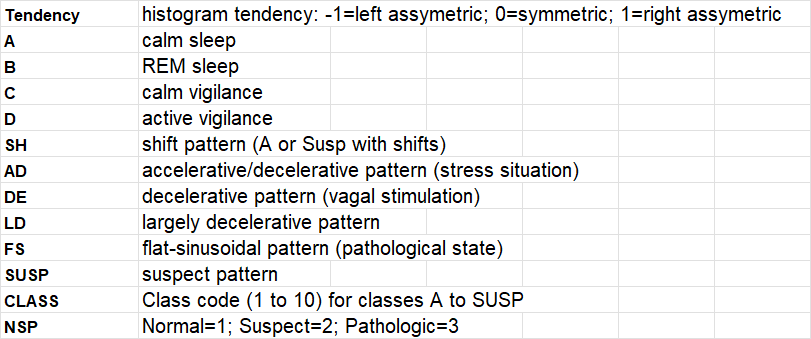

In [136]:
# creating a copy of the CTG_datasheet that has categorical and continuous features
# keep safe as we will likely use this in the final approach to ML as NSP column is ordered levels so 1,2,3 is appropriate
CTG_datasheet_BC=CTG_datasheet.copy() # first creating a backup copy

In [137]:
CTG_datasheet_BC

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,...,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
0,120,0,0,0,0,0,0,73,0.5,43,...,-1,-1,-1,-1,-1,-1,1,-1,9,2
1,132,0.00638,0,0.00638,0.00319,0,0,17,2.1,0,...,-1,-1,-1,1,-1,-1,-1,-1,6,1
2,133,0.003322,0,0.008306,0.003322,0,0,16,2.1,0,...,-1,-1,-1,1,-1,-1,-1,-1,6,1
3,134,0.002561,0,0.007682,0.002561,0,0,16,2.4,0,...,-1,-1,-1,1,-1,-1,-1,-1,6,1
4,132,0.006515,0,0.008143,0,0,0,16,2.4,0,...,-1,-1,-1,-1,-1,-1,-1,-1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140,0,0,0.007426,0,0,0,79,0.2,25,...,-1,-1,1,-1,-1,-1,-1,-1,5,2
2122,140,0.000775,0,0.006971,0,0,0,78,0.4,22,...,-1,-1,1,-1,-1,-1,-1,-1,5,2
2123,140,0.00098,0,0.006863,0,0,0,79,0.4,20,...,-1,-1,1,-1,-1,-1,-1,-1,5,2
2124,140,0.000679,0,0.00611,0,0,0,78,0.4,27,...,-1,-1,1,-1,-1,-1,-1,-1,5,2


In [138]:

#undoing the dummy variab

import pandas as pd

# Mapping for each column
mapping = {
    'Tendency': {-1: 'Left asymmetrical', 0: 'Symmetrical', 1: 'Right asymmetrical'},
    'A': {-1: 'Absence of calm sleep', 1: 'Calm sleep'},
    'B': {-1: 'Absence of REM sleep', 1: 'REM sleep'},
    'C': {-1: 'Absence of calm vigilance', 1: 'Calm vigilance'},
    'D': {-1: 'Absence of active vigilance', 1: 'Active vigilance'},
    'E': {-1: 'Absence of shift pattern', 1: 'Shift pattern'},
    'AD': {-1: 'Absence of accelerative/decelerative pattern', 1: 'Accelerative/decelerative pattern'},
    'DE': {-1: 'Absence of decelerative pattern', 1: 'Decelerative pattern'},
    'LD': {-1: 'Absence of largely decelerative pattern', 1: 'Largely decelerative pattern'},
    'FS': {-1: 'Absence of flat-sinusoidal pattern', 1: 'Flat-sinusoidal pattern'},
    'SUSP': {-1: 'Absence of suspect pattern', 1: 'Suspect pattern'},
    'CLASS': {1: 'Class 1', 2: 'Class 2', 3: 'Class 3', 4: 'Class 4', 5: 'Class 5', 6: 'Class 6',
              7: 'Class 7', 8: 'Class 8', 9: 'Class 9', 10: 'Class 10'},
    'NSP': {1: 'Normal', 2: 'Suspect', 3: 'Pathologic'}
}

# Map the values and perform one-hot encoding
for column, values in mapping.items():
    CTG_datasheet[column] = CTG_datasheet[column].map(values)




In [139]:
 # check the transformation worked
 CTG_datasheet

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,...,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
0,120,0,0,0,0,0,0,73,0.5,43,...,Absence of calm vigilance,Absence of active vigilance,Absence of shift pattern,Absence of accelerative/decelerative pattern,Absence of decelerative pattern,Absence of largely decelerative pattern,Flat-sinusoidal pattern,Absence of suspect pattern,Class 9,Suspect
1,132,0.00638,0,0.00638,0.00319,0,0,17,2.1,0,...,Absence of calm vigilance,Absence of active vigilance,Absence of shift pattern,Accelerative/decelerative pattern,Absence of decelerative pattern,Absence of largely decelerative pattern,Absence of flat-sinusoidal pattern,Absence of suspect pattern,Class 6,Normal
2,133,0.003322,0,0.008306,0.003322,0,0,16,2.1,0,...,Absence of calm vigilance,Absence of active vigilance,Absence of shift pattern,Accelerative/decelerative pattern,Absence of decelerative pattern,Absence of largely decelerative pattern,Absence of flat-sinusoidal pattern,Absence of suspect pattern,Class 6,Normal
3,134,0.002561,0,0.007682,0.002561,0,0,16,2.4,0,...,Absence of calm vigilance,Absence of active vigilance,Absence of shift pattern,Accelerative/decelerative pattern,Absence of decelerative pattern,Absence of largely decelerative pattern,Absence of flat-sinusoidal pattern,Absence of suspect pattern,Class 6,Normal
4,132,0.006515,0,0.008143,0,0,0,16,2.4,0,...,Absence of calm vigilance,Absence of active vigilance,Absence of shift pattern,Absence of accelerative/decelerative pattern,Absence of decelerative pattern,Absence of largely decelerative pattern,Absence of flat-sinusoidal pattern,Absence of suspect pattern,Class 2,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140,0,0,0.007426,0,0,0,79,0.2,25,...,Absence of calm vigilance,Absence of active vigilance,Shift pattern,Absence of accelerative/decelerative pattern,Absence of decelerative pattern,Absence of largely decelerative pattern,Absence of flat-sinusoidal pattern,Absence of suspect pattern,Class 5,Suspect
2122,140,0.000775,0,0.006971,0,0,0,78,0.4,22,...,Absence of calm vigilance,Absence of active vigilance,Shift pattern,Absence of accelerative/decelerative pattern,Absence of decelerative pattern,Absence of largely decelerative pattern,Absence of flat-sinusoidal pattern,Absence of suspect pattern,Class 5,Suspect
2123,140,0.00098,0,0.006863,0,0,0,79,0.4,20,...,Absence of calm vigilance,Absence of active vigilance,Shift pattern,Absence of accelerative/decelerative pattern,Absence of decelerative pattern,Absence of largely decelerative pattern,Absence of flat-sinusoidal pattern,Absence of suspect pattern,Class 5,Suspect
2124,140,0.000679,0,0.00611,0,0,0,78,0.4,27,...,Absence of calm vigilance,Absence of active vigilance,Shift pattern,Absence of accelerative/decelerative pattern,Absence of decelerative pattern,Absence of largely decelerative pattern,Absence of flat-sinusoidal pattern,Absence of suspect pattern,Class 5,Suspect


In [140]:
CTG_datasheet_BC # check the copying is ok


,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,...,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
0,120,0,0,0,0,0,0,73,0.5,43,...,-1,-1,-1,-1,-1,-1,1,-1,9,2
1,132,0.00638,0,0.00638,0.00319,0,0,17,2.1,0,...,-1,-1,-1,1,-1,-1,-1,-1,6,1
2,133,0.003322,0,0.008306,0.003322,0,0,16,2.1,0,...,-1,-1,-1,1,-1,-1,-1,-1,6,1
3,134,0.002561,0,0.007682,0.002561,0,0,16,2.4,0,...,-1,-1,-1,1,-1,-1,-1,-1,6,1
4,132,0.006515,0,0.008143,0,0,0,16,2.4,0,...,-1,-1,-1,-1,-1,-1,-1,-1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140,0,0,0.007426,0,0,0,79,0.2,25,...,-1,-1,1,-1,-1,-1,-1,-1,5,2
2122,140,0.000775,0,0.006971,0,0,0,78,0.4,22,...,-1,-1,1,-1,-1,-1,-1,-1,5,2
2123,140,0.00098,0,0.006863,0,0,0,79,0.4,20,...,-1,-1,1,-1,-1,-1,-1,-1,5,2
2124,140,0.000679,0,0.00611,0,0,0,78,0.4,27,...,-1,-1,1,-1,-1,-1,-1,-1,5,2


In [141]:
# saving both files

# Save CTG_datasheet as a CSV file
CTG_datasheet.to_csv('CTG_datasheet.csv', index=False)

# Save CTG_datasheet_BC as a CSV file
CTG_datasheet_BC.to_csv('CTG_datasheet_BC.csv', index=False)


In [142]:
# check the levels
# we use a for loop to loop through the columns then we make our output easier to understand by naming the columns
categorical_columns = ['A', 'B', 'C', 'D', 'E', 'AD', 'DE', 'LD', 'FS', 'SUSP', 'CLASS', 'NSP', 'Tendency']

for column in categorical_columns:
    unique_values = CTG_datasheet[column].unique()
    print(f"Column: {column}")
    print(unique_values)
    print()

Column: A
['Absence of calm sleep' 'Calm sleep']

Column: B
['Absence of REM sleep' 'REM sleep']

Column: C
['Absence of calm vigilance' 'Calm vigilance']

Column: D
['Absence of active vigilance' 'Active vigilance']

Column: E
['Absence of shift pattern' 'Shift pattern']

Column: AD
['Absence of accelerative/decelerative pattern'
 'Accelerative/decelerative pattern']

Column: DE
['Absence of decelerative pattern' 'Decelerative pattern']

Column: LD
['Absence of largely decelerative pattern' 'Largely decelerative pattern']

Column: FS
['Flat-sinusoidal pattern' 'Absence of flat-sinusoidal pattern']

Column: SUSP
['Absence of suspect pattern' 'Suspect pattern']

Column: CLASS
['Class 9' 'Class 6' 'Class 2' 'Class 8' 'Class 10' 'Class 7' 'Class 1'
 'Class 3' 'Class 5' 'Class 4']

Column: NSP
['Suspect' 'Normal' 'Pathologic']

Column: Tendency
['Right asymmetrical' 'Symmetrical' 'Left asymmetrical']



#Data Quality Report (Re-run)
[A] Continuous

In [143]:
# running the continuous data quality report
CTG_datasheet[['LB','AC','FM','UC','ASTV','MSTV',
          'ALTV','MLTV','DL','DS','DP','Width',
          'Min','Max','Nmax','Nzeros','Mode','Mean','Median','Variance', 'Tendency', 'A', 'B', 'C', 'D', 'E', 'AD', 'DE', 'LD', 'FS', 'SUSP', 'CLASS', 'NSP'


]].describe().transpose()

,count,unique,top,freq
0,,,,
LB,2126,48,133,136
AC,2126.0,1015.0,0.0,891.0
FM,2126.0,696.0,0.0,1311.0
UC,2126.0,1315.0,0.0,332.0
ASTV,2126,75,60,62
MSTV,2126.0,57.0,0.8,125.0
ALTV,2126,87,0,1240
MLTV,2126.0,249.0,0.0,137.0
DL,2126.0,751.0,0.0,1231.0


In [144]:
# check the data types
print(CTG_datasheet.dtypes.to_string())


0
LB          object
AC          object
FM          object
UC          object
DL          object
DS          object
DP          object
ASTV        object
MSTV        object
ALTV        object
MLTV        object
Width       object
Min         object
Max         object
Nmax        object
Nzeros      object
Mode        object
Mean        object
Median      object
Variance    object
Tendency    object
A           object
B           object
C           object
D           object
E           object
AD          object
DE          object
LD          object
FS          object
SUSP        object
CLASS       object
NSP         object


**Comment**- by running the report and subsequently detecting the dtypes (data types) to confirm my suspicions, it appears that the continuous features are in string form.
The only solution is to manually change this to floats or integers

In [145]:
# converting stringed numbers to floats (= decimal numbers)
continuous_columns = ['LB', 'AC',  'FM', 'UC', 'DL', 'DS', 'DP',
'ASTV', 'MSTV', 'ALTV', 'MLTV', 'Width', 'Min', 'Max', 'Nmax',
'Nzeros', 'Mode', 'Mean', 'Median', 'Variance']
CTG_datasheet[continuous_columns] = CTG_datasheet[continuous_columns].astype(float)


In [146]:
# check the data types
print(CTG_datasheet.dtypes.to_string())

0
LB          float64
AC          float64
FM          float64
UC          float64
DL          float64
DS          float64
DP          float64
ASTV        float64
MSTV        float64
ALTV        float64
MLTV        float64
Width       float64
Min         float64
Max         float64
Nmax        float64
Nzeros      float64
Mode        float64
Mean        float64
Median      float64
Variance    float64
Tendency     object
A            object
B            object
C            object
D            object
E            object
AD           object
DE           object
LD           object
FS           object
SUSP         object
CLASS        object
NSP          object


Do the same for the CTG_datasheet_BC version

In [147]:
# converting stringed numbers to floats (= decimal numbers)
continuous_columns = ['LB', 'AC',  'FM', 'UC', 'DL', 'DS', 'DP',
'ASTV', 'MSTV', 'ALTV', 'MLTV', 'Width', 'Min', 'Max', 'Nmax',
'Nzeros', 'Mode', 'Mean', 'Median', 'Variance']
CTG_datasheet_BC[continuous_columns] = CTG_datasheet_BC[continuous_columns].astype(float)
# check the data types
print(CTG_datasheet_BC.dtypes.to_string())

0
LB          float64
AC          float64
FM          float64
UC          float64
DL          float64
DS          float64
DP          float64
ASTV        float64
MSTV        float64
ALTV        float64
MLTV        float64
Width       float64
Min         float64
Max         float64
Nmax        float64
Nzeros      float64
Mode        float64
Mean        float64
Median      float64
Variance    float64
Tendency     object
A            object
B            object
C            object
D            object
E            object
AD           object
DE           object
LD           object
FS           object
SUSP         object
CLASS        object
NSP          object


In [148]:
# saving both files

# Save CTG_datasheet as a CSV file
CTG_datasheet.to_csv('CTG_datasheet.csv', index=False)

# Save CTG_datasheet_BC as a CSV file
CTG_datasheet_BC.to_csv('CTG_datasheet_BC.csv', index=False)

## Check for Missing Values

In [149]:
 ############################ Missing Values Reports##########################
# Check for missing values
missing_values = CTG_datasheet.isnull().sum()
print("Missing Values:")
print(missing_values)

# Check for duplicates
duplicates = CTG_datasheet.duplicated()
print("\nDuplicate Rows:")
print(CTG_datasheet[duplicates])

# Count the number of duplicate rows
num_duplicates = CTG_datasheet.duplicated().sum()
print(f"\nNumber of Duplicate Rows: {num_duplicates}")


Missing Values:
0
LB          0
AC          0
FM          0
UC          0
DL          0
DS          0
DP          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
Width       0
Min         0
Max         0
Nmax        0
Nzeros      0
Mode        0
Mean        0
Median      0
Variance    0
Tendency    0
A           0
B           0
C           0
D           0
E           0
AD          0
DE          0
LD          0
FS          0
SUSP        0
CLASS       0
NSP         0
dtype: int64

Duplicate Rows:
0        LB        AC        FM        UC   DL   DS   DP  ASTV  MSTV  ALTV  \
68    140.0  0.007278  0.000000  0.004367  0.0  0.0  0.0  34.0   1.2   0.0   
234   123.0  0.000000  0.000000  0.000000  0.0  0.0  0.0  49.0   0.8   7.0   
306   145.0  0.000000  0.020249  0.000000  0.0  0.0  0.0  77.0   0.2  45.0   
324   135.0  0.000000  0.000000  0.000000  0.0  0.0  0.0  62.0   0.5  71.0   
333   144.0  0.000000  0.018541  0.000000  0.0  0.0  0.0  76.0   0.4  61.0   
787   123.0  0.002502 

In [150]:
 ############################ Missing Values Reports##########################
# Check for missing values
missing_values = CTG_datasheet_BC.isnull().sum()
print("Missing Values:")
print(missing_values)

# Check for duplicates
duplicates = CTG_datasheet_BC.duplicated()
print("\nDuplicate Rows:")
print(CTG_datasheet_BC[duplicates])

# Count the number of duplicate rows
num_duplicates = CTG_datasheet_BC.duplicated().sum()
print(f"\nNumber of Duplicate Rows: {num_duplicates}")


Missing Values:
0
LB          0
AC          0
FM          0
UC          0
DL          0
DS          0
DP          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
Width       0
Min         0
Max         0
Nmax        0
Nzeros      0
Mode        0
Mean        0
Median      0
Variance    0
Tendency    0
A           0
B           0
C           0
D           0
E           0
AD          0
DE          0
LD          0
FS          0
SUSP        0
CLASS       0
NSP         0
dtype: int64

Duplicate Rows:
0        LB        AC        FM        UC   DL   DS   DP  ASTV  MSTV  ALTV  \
68    140.0  0.007278  0.000000  0.004367  0.0  0.0  0.0  34.0   1.2   0.0   
234   123.0  0.000000  0.000000  0.000000  0.0  0.0  0.0  49.0   0.8   7.0   
306   145.0  0.000000  0.020249  0.000000  0.0  0.0  0.0  77.0   0.2  45.0   
324   135.0  0.000000  0.000000  0.000000  0.0  0.0  0.0  62.0   0.5  71.0   
333   144.0  0.000000  0.018541  0.000000  0.0  0.0  0.0  76.0   0.4  61.0   
787   123.0  0.002502 

**Comment:** Although it may seem there are duplicates, if you examine the 11 examples they're different instances of data

In [151]:
CTG_datasheet_BC

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,...,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
0,120.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,...,-1,-1,-1,-1,-1,-1,1,-1,9,2
1,132.0,0.006380,0.000000,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,...,-1,-1,-1,1,-1,-1,-1,-1,6,1
2,133.0,0.003322,0.000000,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,...,-1,-1,-1,1,-1,-1,-1,-1,6,1
3,134.0,0.002561,0.000000,0.007682,0.002561,0.0,0.0,16.0,2.4,0.0,...,-1,-1,-1,1,-1,-1,-1,-1,6,1
4,132.0,0.006515,0.000000,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,...,-1,-1,-1,-1,-1,-1,-1,-1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000000,0.000000,0.007426,0.000000,0.0,0.0,79.0,0.2,25.0,...,-1,-1,1,-1,-1,-1,-1,-1,5,2
2122,140.0,0.000775,0.000000,0.006971,0.000000,0.0,0.0,78.0,0.4,22.0,...,-1,-1,1,-1,-1,-1,-1,-1,5,2
2123,140.0,0.000980,0.000000,0.006863,0.000000,0.0,0.0,79.0,0.4,20.0,...,-1,-1,1,-1,-1,-1,-1,-1,5,2
2124,140.0,0.000679,0.000000,0.006110,0.000000,0.0,0.0,78.0,0.4,27.0,...,-1,-1,1,-1,-1,-1,-1,-1,5,2


# Re-run the data quality reports
[A] Continuous

In [152]:
continuous_data_quality_report = CTG_datasheet.describe()

In [153]:
continuous_data_quality_report

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003170,0.009474,0.004357,0.001885,0.000004,0.000157,46.990122,1.332785,9.84666,8.187629,70.445908,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090
std,9.840844,0.003860,0.046670,0.002940,0.002962,0.000063,0.000580,17.192814,0.883241,18.39688,5.628247,38.955693,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,0.000000,3.000000,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000
25%,126.000000,0.000000,0.000000,0.001876,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,4.600000,37.000000,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000
50%,133.000000,0.001630,0.000000,0.004482,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,7.400000,67.500000,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000
75%,140.000000,0.005631,0.002512,0.006525,0.003264,0.000000,0.000000,61.000000,1.700000,11.00000,10.800000,100.000000,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000
max,160.000000,0.019284,0.480634,0.014925,0.015385,0.001353,0.005348,87.000000,7.000000,91.00000,50.700000,180.000000,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000


(B) Categorical Data Report

In [154]:
 categorical_data_quality_report=CTG_datasheet.describe(include='object').transpose()

In [155]:
categorical_data_quality_report

,count,unique,top,freq
0,,,,
Tendency,2126,3,Symmetrical,1115
A,2126,2,Absence of calm sleep,1742
B,2126,2,Absence of REM sleep,1547
C,2126,2,Absence of calm vigilance,2073
D,2126,2,Absence of active vigilance,2045
E,2126,2,Absence of shift pattern,2054
AD,2126,2,Absence of accelerative/decelerative pattern,1794
DE,2126,2,Absence of decelerative pattern,1874
LD,2126,2,Absence of largely decelerative pattern,2019


# Visualizations
## Workup of the Continuous Features

In [156]:
### import the libraries
# modules for ploting
import matplotlib.pyplot as plt
import seaborn as sns

from yellowbrick.style import set_palette, color_palette
set_palette('yellowbrick')

from matplotlib import rcParams
rcParams["figure.figsize"] = [8, 6]

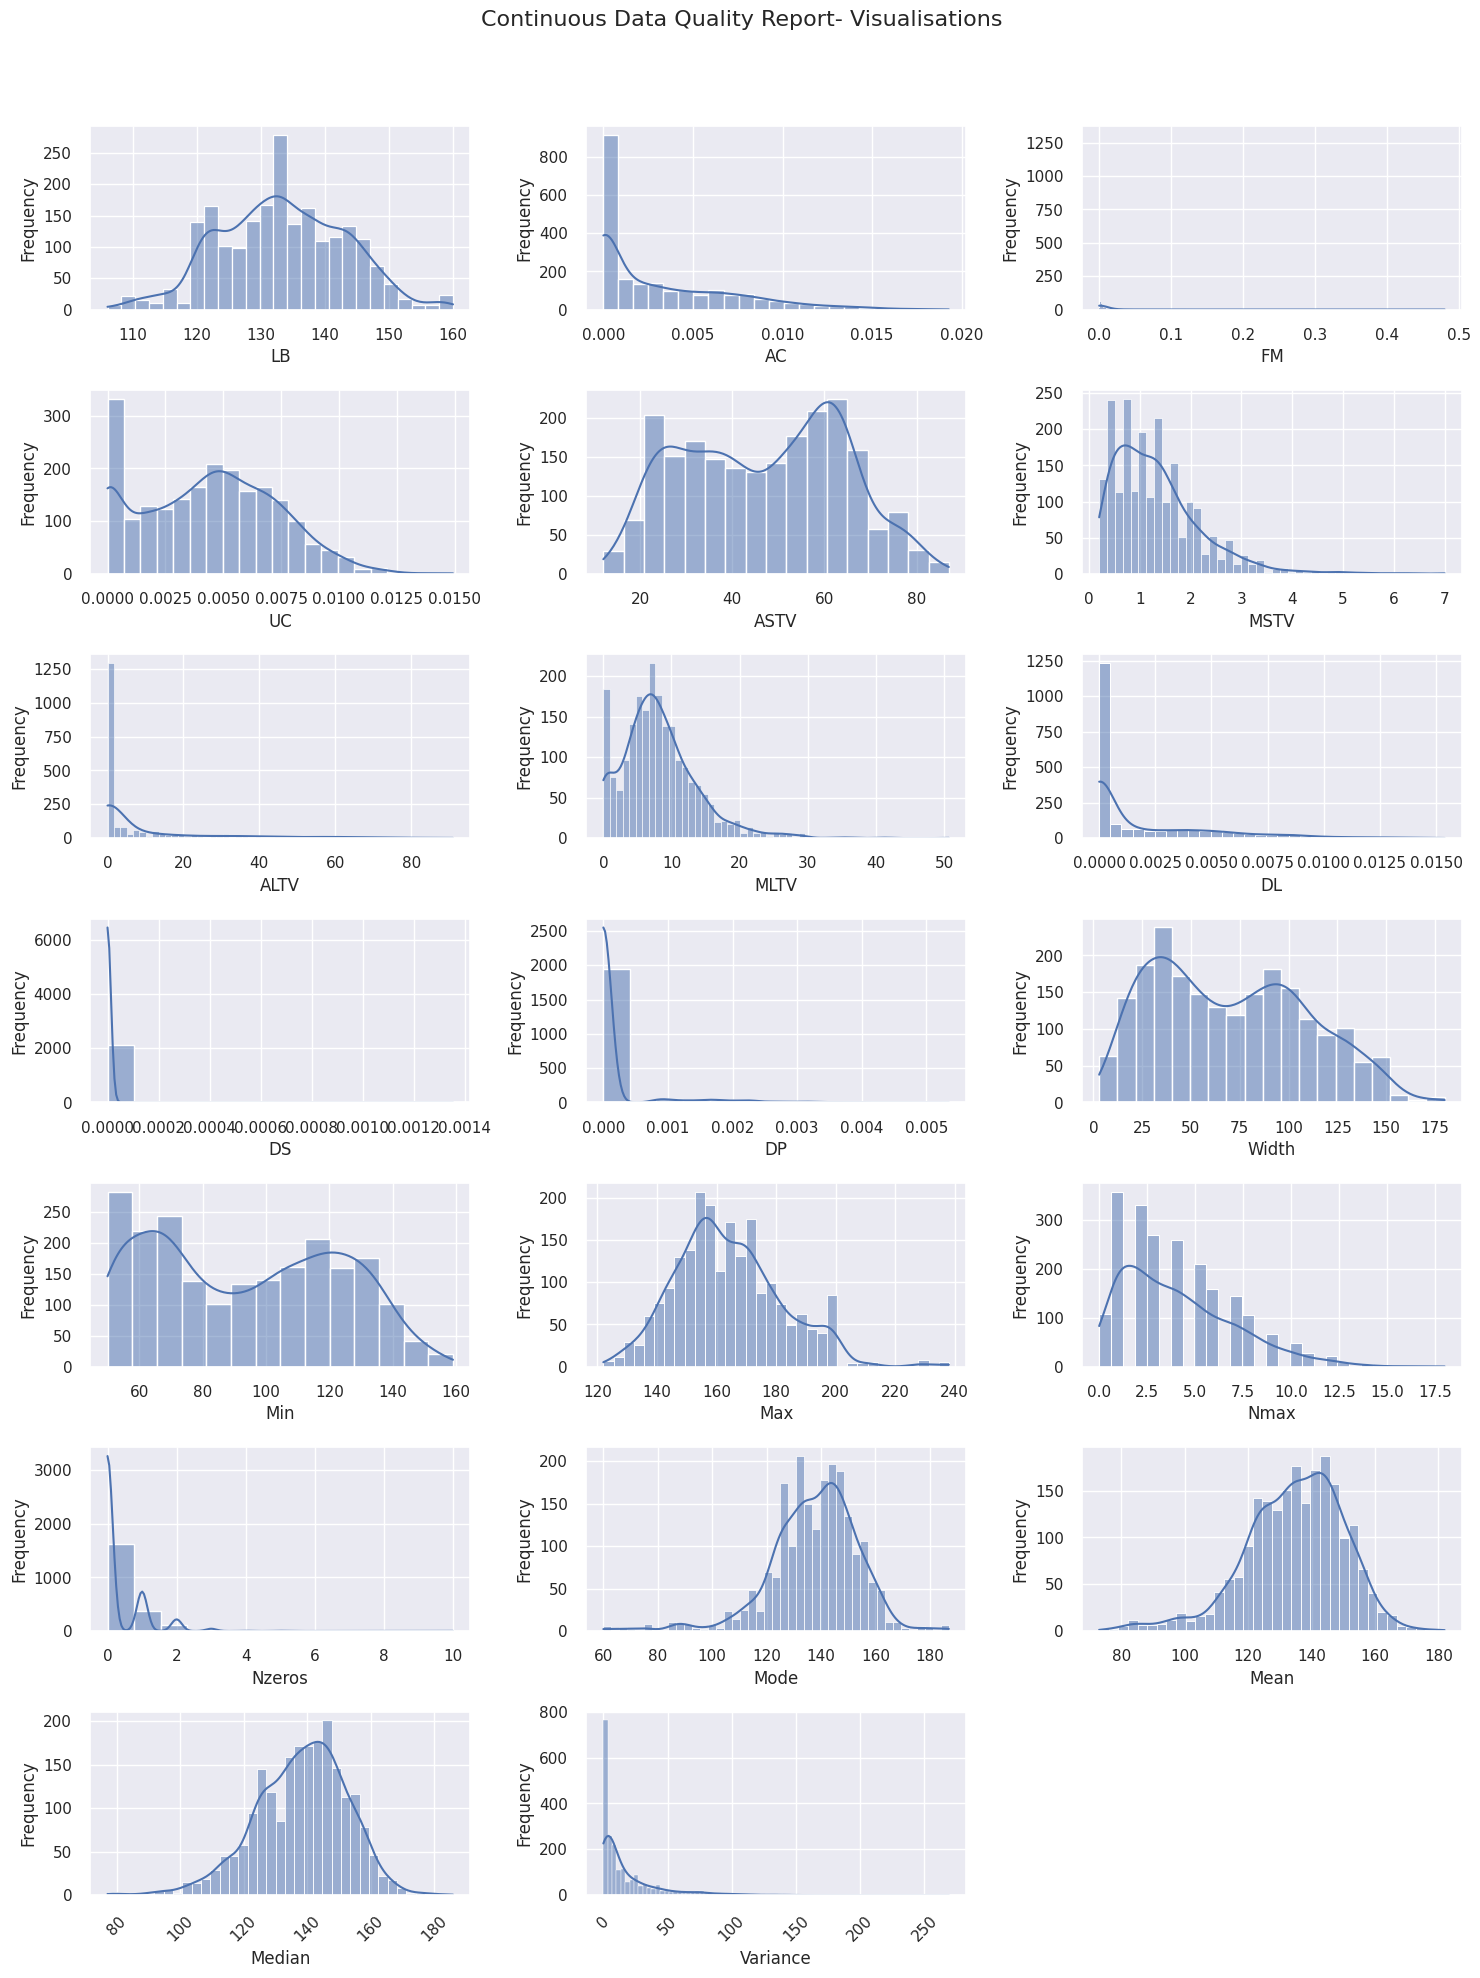

In [157]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set style for the plot (optional but recommended)
sns.set()

# Define continuous columns
continuous_columns = ['LB', 'AC', 'FM', 'UC', 'ASTV', 'MSTV', 'ALTV', 'MLTV', 'DL', 'DS', 'DP', 'Width', 'Min', 'Max', 'Nmax', 'Nzeros', 'Mode', 'Mean', 'Median', 'Variance']

# Create the subplots
fig, axes = plt.subplots(nrows=7, ncols=3, figsize=(15, 20))

# Loop through continuous columns and plot histograms
for i, column in enumerate(continuous_columns):
    row, col = divmod(i, 3)
    sns.histplot(x=column, data=CTG_datasheet, ax=axes[row, col], kde=True)
    axes[row, col].set_xlabel(column)  # Set x-axis label
    axes[row, col].set_ylabel('Frequency')  # Set y-axis label

# Add title to the entire figure
plt.suptitle('Continuous Data Quality Report- Visualisations', fontsize=16)

# Adjust spacing and layout
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Add some space for the title

# Rotate x-axis labels for last row
axes[6, 0].tick_params(axis='x', rotation=45)
axes[6, 1].tick_params(axis='x', rotation=45)
axes[6, 2].tick_params(axis='x', rotation=45)

# tidy up the blank graph
fig.delaxes(axes[6, 2]) # position [6, 2]

# Display the plot
plt.show()


<Axes: xlabel='FM', ylabel='Density'>

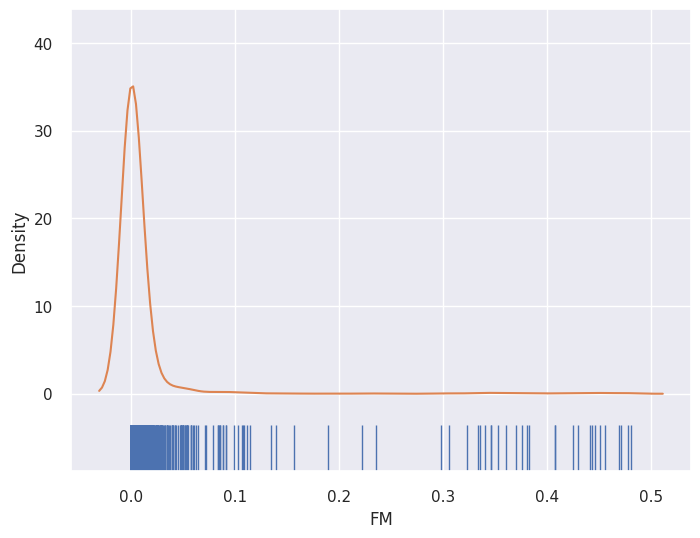

In [158]:
# showing the FM plot more clearly
sns.set_theme()

sns.rugplot(data=CTG_datasheet,x='FM', height=0.1)
sns.kdeplot(data=CTG_datasheet, x="FM", )

## Visualising the Categorical Data

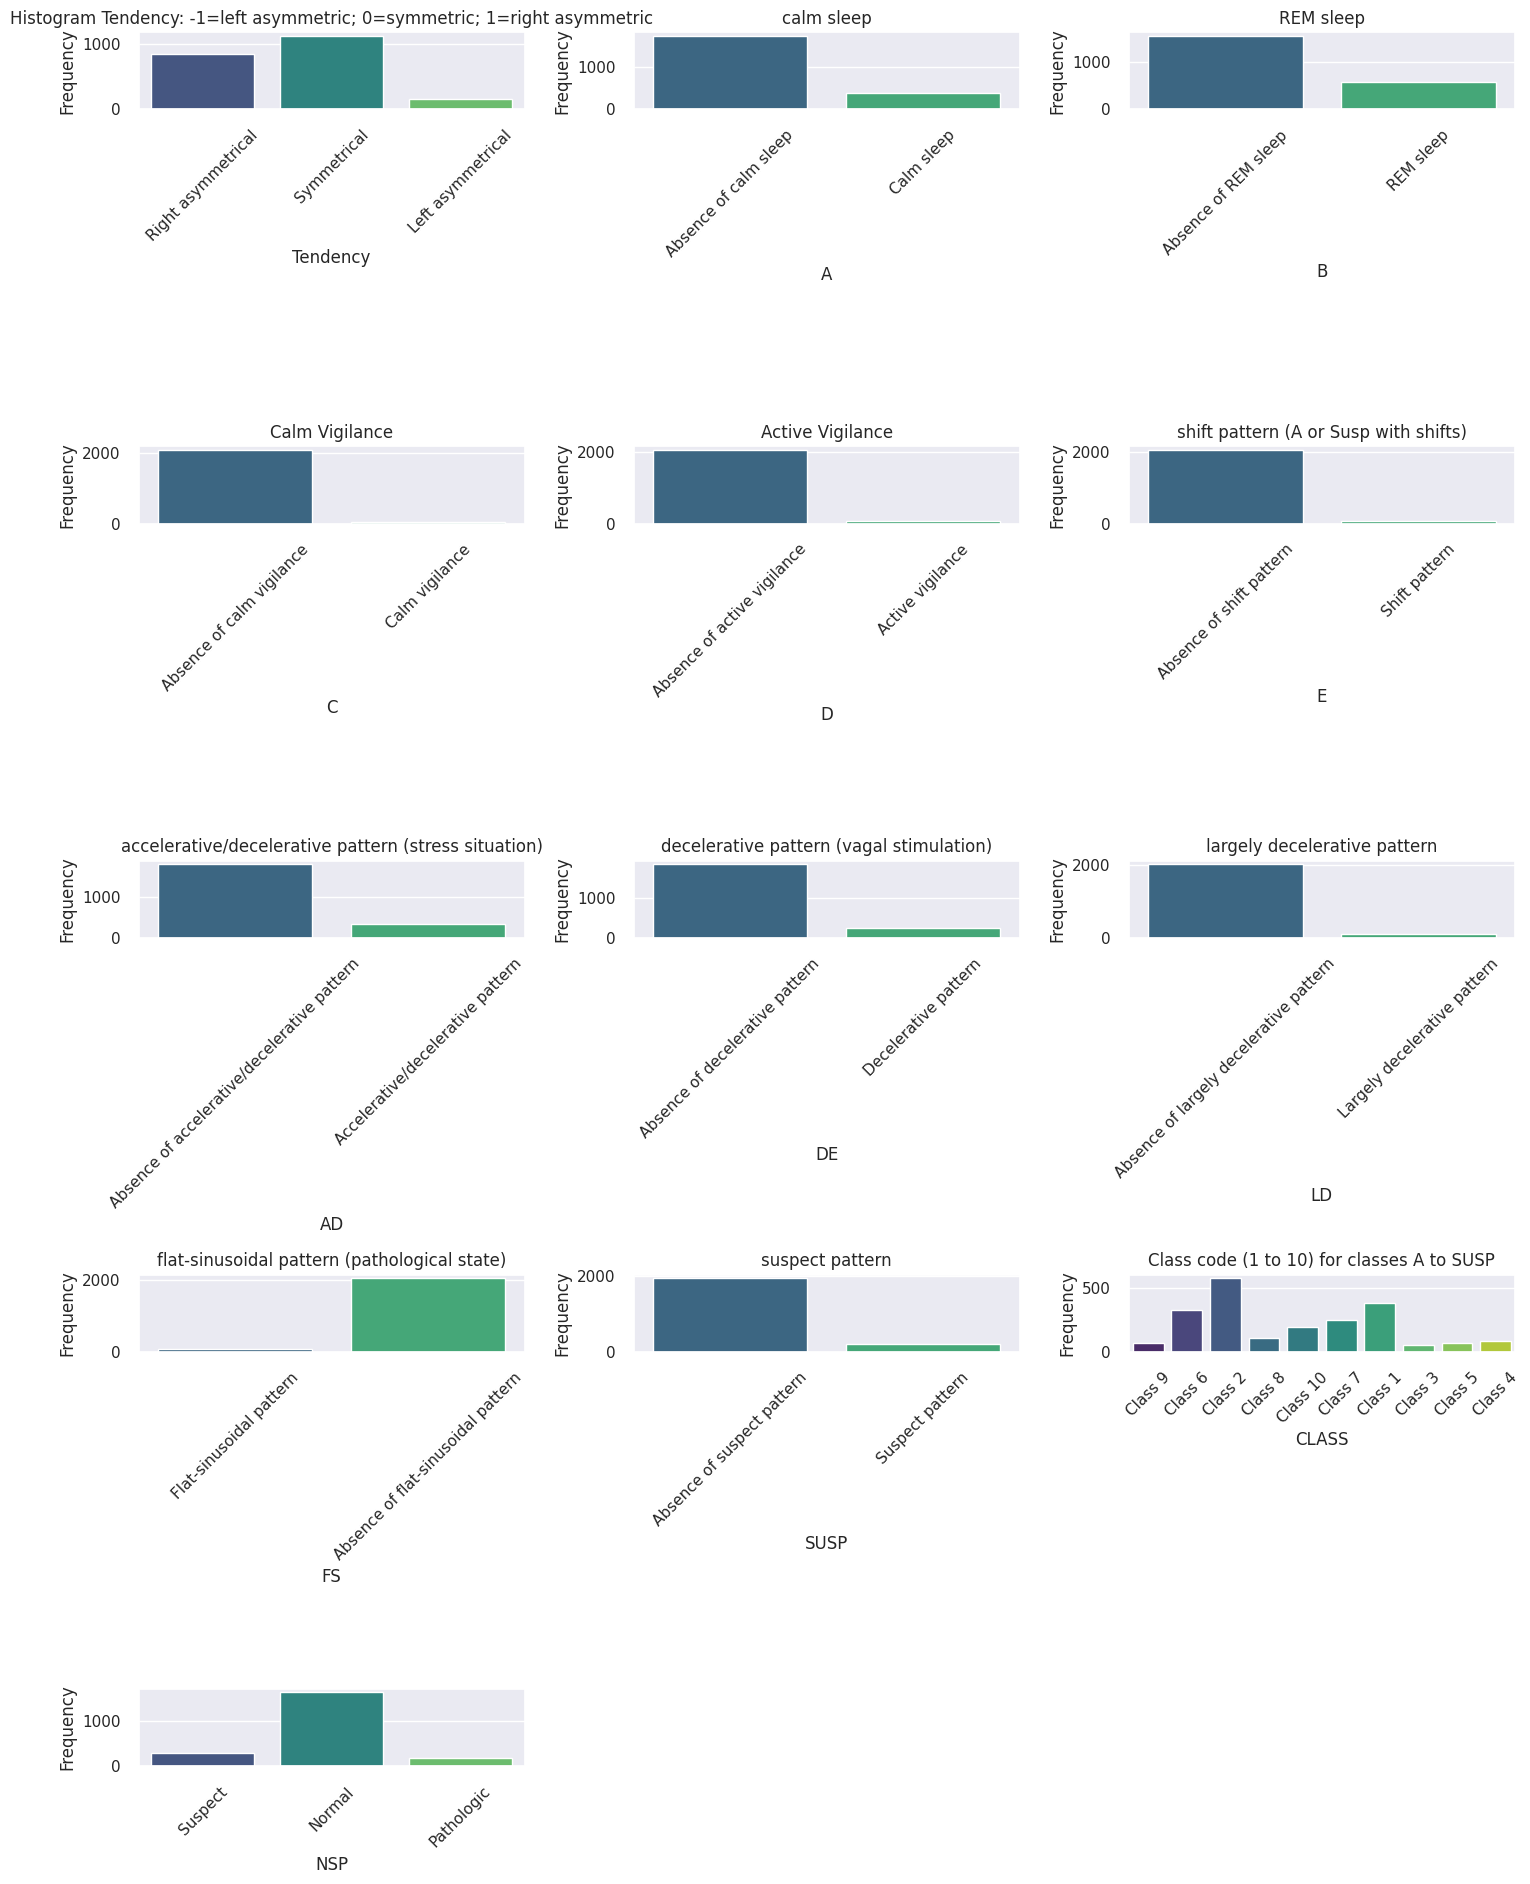

In [159]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set style for the plot (optional but recommended)
sns.set()

# Create the subplots
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 20))

# List of categorical columns
categorical_columns = ['Tendency', 'A', 'B', 'C', 'D', 'E', 'AD', 'DE', 'LD', 'FS', 'SUSP', 'CLASS', 'NSP']

# Loop through categorical columns and plot bar plots
for i, column in enumerate(categorical_columns):
    row, col = divmod(i, 3)
    sns.countplot(x=column, data=CTG_datasheet, ax=axes[row, col], palette='viridis')
    axes[row, col].set_xlabel(column)  # Set x-axis label
    axes[row, col].set_ylabel('Frequency')  # Set y-axis label
    axes[row, col].tick_params(axis='x', rotation=45)  # Rotate x-axis labels

# Add titles to each subplot
axes[0, 0].set_title('Histogram Tendency: -1=left asymmetric; 0=symmetric; 1=right asymmetric')
axes[0, 1].set_title('calm sleep')
axes[0, 2].set_title('REM sleep')
axes[1, 0].set_title('Calm Vigilance')
axes[1, 1].set_title('Active Vigilance')
axes[1, 2].set_title('shift pattern (A or Susp with shifts)')
axes[2, 0].set_title('accelerative/decelerative pattern (stress situation)')
axes[2, 1].set_title('decelerative pattern (vagal stimulation)')
axes[2, 2].set_title('largely decelerative pattern')
axes[3, 0].set_title('flat-sinusoidal pattern (pathological state)')
axes[3, 1].set_title('suspect pattern')
axes[3, 2].set_title('Class code (1 to 10) for classes A to SUSP')
axes[4, 1].set_title('Normal=1; Suspect=2; Pathologic=3')

# Remove empty subplots
fig.delaxes(axes[4, 1])  # position [4, 1]
fig.delaxes(axes[4, 2])  # position [4, 2]

# Add some space between subplots
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Add some space for the title

# Display the plot
plt.show()


## Eliminating the Target Columns that are superfluous to our plan

In [161]:
CTG_datasheet.columns # remind myself of the column names

Index(['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV',
       'MLTV', 'Width', 'Min', 'Max', 'Nmax', 'Nzeros', 'Mode', 'Mean',
       'Median', 'Variance', 'Tendency', 'A', 'B', 'C', 'D', 'E', 'AD', 'DE',
       'LD', 'FS', 'SUSP', 'CLASS', 'NSP'],
      dtype='object', name=0)

In [162]:
# List of columns to drop
columns_to_drop = ['A', 'B', 'C', 'D', 'E', 'AD', 'DE', 'LD', 'FS', 'SUSP', 'CLASS']

# Drop columns from CTG_datasheet
CTG_datasheet = CTG_datasheet.drop(columns_to_drop, axis=1)

# Drop columns from CTG_datasheet_BC
CTG_datasheet_BC = CTG_datasheet_BC.drop(columns_to_drop, axis=1)


## Making Hard Copies of the two dataframes

In [163]:
# saving both files

# Save CTG_datasheet as a CSV file
CTG_datasheet.to_csv('CTG_datasheet_NSP.csv', index=False)

# Save CTG_datasheet_BC as a CSV file
CTG_datasheet_BC.to_csv('CTG_datasheet_BC_NSP.csv', index=False)
